# Generate Xenograft Simulation Data

## Cell per Spot (Visium Statistcs)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


data_dir = r"Z:\MorrissyLab Dropbox\Visium_profiling\Cell_Segmentation"

dfs = []
for sample in os.listdir(data_dir):
    df = pd.read_csv(os.path.join(data_dir,sample, f"{sample}_tissue_positions_list.csv"), index_col=0)
    dfs.append(df)

dfs = pd.concat(dfs)
dfs.head()

# Filter the DataFrame where 'spot_image_name' is not None
filtered_df = dfs[dfs['spot_image_name'].notna()]

# Define integer bins based on the range of the data
min_val = filtered_df['n_segmented_cells'].min()
max_val = filtered_df['n_segmented_cells'].max()
bins = np.arange(min_val, max_val + 2)  # Add 2 to include the last integer value

# Create the histogram
sns.histplot(data=filtered_df, x='n_segmented_cells', bins=bins, kde=False)

# Customize x-axis ticks to show only integers
plt.xticks(bins)
plt.xlabel('Number of cells per spot')
plt.ylabel('Frequency')
plt.title('Histogram of n_cells per spot')
plt.savefig(os.path.join(r"Z:\MorrissyLab Dropbox\Manuscripts_in_progress\Wassgard\Raw_Data", "XenoBenchmark", f"histogram_cells_per_spot.pdf"))

plt.show()




df_joined = df_admix.join(dfs)
filtered_df = df_joined[df_joined['spot_image_name'].notna()]



# Define a color palette for each call value
palette = {'Multiplet': 'steelblue', 'mm10': 'coral', 'GRCh38': 'forestgreen'}

# Create a subplot for each unique call
unique_calls = filtered_df['call'].unique()
fig, axes = plt.subplots(1, len(unique_calls), figsize=(18, 5), sharex=False, sharey=False)

for ax, call in zip(axes, unique_calls):
    subset = filtered_df[filtered_df['call'] == call]
        # Determine integer bins based on the range of n_segmented_cells
    min_val = int(np.floor(subset['n_segmented_cells'].min()))
    max_val = int(np.ceil(subset['n_segmented_cells'].max()))
    bins = range(0, max_val)

    sns.histplot(subset['n_segmented_cells'], ax=ax, bins=bins, color=palette[call], edgecolor='black')
    ax.set_title(f'Call {call}')
    ax.set_xlabel('n_segmented_cells')
    ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()





data_dir = r"Z:\MorrissyLab Dropbox\Visium_profiling\Cell_Segmentation"

dfs = []
for sample in os.listdir(data_dir):
    df = pd.read_csv(os.path.join(data_dir,sample, f"{sample}_tissue_positions_list.csv"), index_col=0)
    dfs.append(df)

dfs = pd.concat(dfs)
dfs.head()

# Filter the DataFrame where 'spot_image_name' is not None
filtered_df = dfs[dfs['spot_image_name'].notna()]

# Define integer bins based on the range of the data
min_val = filtered_df['n_segmented_cells'].min()
max_val = filtered_df['n_segmented_cells'].max()
bins = np.arange(min_val, max_val + 2)  # Add 2 to include the last integer value

# Create the histogram
sns.histplot(data=filtered_df, x='n_segmented_cells', bins=bins, kde=False)

# Customize x-axis ticks to show only integers
plt.xticks(bins)
plt.xlabel('Number of cells per spot')
plt.ylabel('Frequency')
plt.title('Histogram of n_cells per spot')
plt.show()



## Data Generation

In [38]:
import os 
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
import matplotlib.pyplot as plt
import pandas as pd
import scanpy as sc
import numpy as np

file_path = r"Z:\MorrissyLab Dropbox\Visium_profiling\benchmark\data\stereoseq_mouse_brain_li2023_sim_norm_mm\Mouse_brain_cell_bin.h5ad"
output_path = os.path.join(os.path.dirname(file_path), "simulated_data")
df_admix = pd.read_csv(fr"Z:\MorrissyLab Dropbox\Visium_profiling\benchmark\simulation\stats\sample_obs.csv", index_col=0)



# plt.savefig(os.path.join(r"Z:\MorrissyLab Dropbox\Manuscripts_in_progress\Wassgard\Raw_Data", "XenoBenchmark", f"scatter_admix_statics.pdf"))
# plt.show()


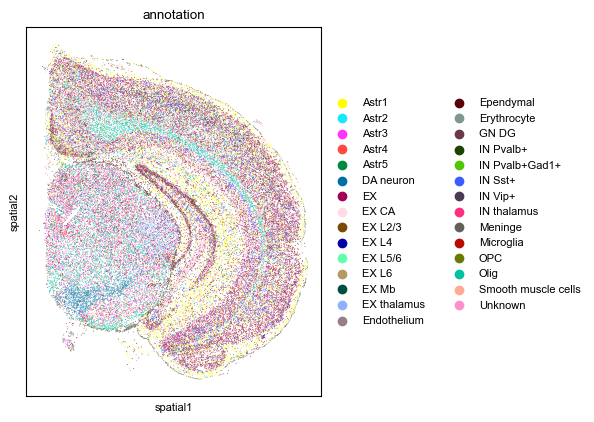

Saved to: figures\spatial_annotation_plot.pdf


In [36]:


tme_list_template = ['Astr3', 'Astr5', "OPC", "Ependymal"]

import scanpy as sc
import os

# Set custom figure directory
sc.settings.figdir = "figures"  # or any other path you prefer
os.makedirs(sc.settings.figdir, exist_ok=True)

# Read and prepare data
adata = sc.read_h5ad(file_path)
adata.obsm["X_spatial"] = adata.obsm["spatial"]

# Plot and save as PDF
sc.pl.spatial(
    adata,
    basis="spatial",
    color="annotation",
    spot_size=30,
    save="_annotation_plot.pdf"
)

# Full path to saved file
full_path = os.path.join(sc.settings.figdir, "spatial_annotation_plot.pdf")
print("Saved to:", full_path)




# # Define the number of subplots based on the length of tme_list
# n_cells = len(tme_list_template)
# n_cols = 5  # Set the number of columns for the subplots
# n_rows = -(-n_cells // n_cols)  # This calculates the required number of rows

# fig, axes = plt.subplots(n_rows, n_cols, figsize=(4*n_cols, 4*n_rows))

# # Flatten the axes array for easy iteration
# axes = axes.flatten()

# for i, cell_type in enumerate(tme_list_template):
#     # Create a new column for each cell type where all other cells are labeled as 'z'
#     adata.obs[f'{cell_type}_annotation'] = adata.obs['annotation'].apply(lambda x: x if x == cell_type else 'z')

#     # Plot the spatial plot using the new annotation
#     sc.pl.spatial(
#         adata, 
#         basis="spatial", 
#         color=f'{cell_type}_annotation', 
#         spot_size=100, 
#         palette=["red", "grey"], 
#         ax=axes[i],
#         show=False
#     )
#     axes[i].set_title(cell_type)

# # Hide any empty subplots
# for j in range(i + 1, len(axes)):
#     fig.delaxes(axes[j])

# plt.tight_layout()
# plt.show()

In [ ]:
def subsample_reads_df(matrix_sampled: pd.DataFrame, xenograft_admix_df: pd.DataFrame):
    np.random.seed(42)

    # Sample random values from xenograft_admix_df['mm10'] to match the number of rows in the matrix
    target_admix = np.random.choice(xenograft_admix_df['admix'].values, size=len(matrix_sampled))
    
    ## Create new synthetic data
    new_matrix = pd.DataFrame(0, index=matrix_sampled.index, columns=matrix_sampled.columns)

    for i, (index, row) in enumerate(matrix_sampled.iterrows()):

        non_zero_indices = row[row > 0].index  # Get indices of non-zero elements
        non_zero_elements = row[non_zero_indices].values
        current_sum = non_zero_elements.sum()
        target_sum = int(target_admix[i] * current_sum)

        if current_sum > 0:
            
            # subsample reads based on the new target sum
            non_zero_pos_indices = [matrix_sampled.columns.get_loc(col) for col in non_zero_indices]
            flattened_row = np.concatenate([[pos] * int(np.ceil(count)) for pos, count in zip(non_zero_pos_indices, non_zero_elements)])
            subsampled_reads = np.random.choice(flattened_row, size=target_sum, replace=len(flattened_row) < target_sum)

            # Reconstruct the gene expression 
            subsampled_counts = pd.Series(np.bincount(subsampled_reads, minlength=len(row)), index=matrix_sampled.columns)
            for pos, count in enumerate(subsampled_counts):
                if count > 0:
                    col_name = matrix_sampled.columns[pos]
                    new_matrix.at[index, col_name] = count
        else:
            new_matrix.loc[index] = row  # If the row sum is 0, just keep it as is
    
    return new_matrix


bin_genes_template =  pd.read_csv(os.path.join(output_path, "combined_spatial_count.txt"), sep="\t", index_col=0)
n_samples = 3000     # n_samples = len(sub_df['mm10'])
matrix_sampled = bin_genes_template.sample(n=n_samples, random_state=42)

# for sample_name in df_admix["sample_id"].unique():
#     print(sample_name)
#     sub_df = df_admix[df_admix["sample_id"]==sample_name]

#     simulated_template = subsample_reads_df(matrix_sampled, sub_df)
#     simulated_template = simulated_template.sort_index()
#     simulated_template.to_csv(os.path.join(output_path, f"combined_spatial_count_simulated_{sample_name}_subsample.txt"), sep="\t")



bins_annotations = pd.read_csv(os.path.join(output_path, "combined_spot_clusters.txt"), sep="\t", index_col=0)





In [8]:
### Per cell type
from tqdm import tqdm
for cell_type in tqdm(bins_annotations.columns):
    index_with_values_template = bins_annotations[bins_annotations[[cell_type]].gt(0).any(axis=1)].index
    valid_indices = matrix_sampled.index.intersection(index_with_values_template)
    bin_genes_template_tme = matrix_sampled.loc[valid_indices, :]
    bin_genes_template_not_in_tme = matrix_sampled.drop(valid_indices)


    for sample_name in df_admix["sample_id"].unique():
        file_save  = os.path.join(output_path, f"combined_spatial_count_simulated_{sample_name}_tme_{cell_type.replace(' ','_').replace('/','_')}_subsample.txt")

        if(os.path.exists(file_save)):
            continue

        print(sample_name, 'TME', cell_type)
        sub_df = df_admix[df_admix["sample_id"]==sample_name]
        sub_df_tme = sub_df[(sub_df['admix'] < 0.9) & (sub_df['admix'] > 0.1)]
        simulated_template_tme = subsample_reads_df(bin_genes_template_tme, sub_df_tme)

        sub_df_not_in_tme = sub_df[(sub_df['admix'] >= 0.9)]
        simulated_template_normal = subsample_reads_df(bin_genes_template_not_in_tme, sub_df_not_in_tme)

        simulated_template = pd.concat([simulated_template_tme, simulated_template_normal])

        simulated_template = simulated_template.sort_index()
        simulated_template.to_csv(file_save, sep="\t")

 17%|█▋        | 5/29 [00:01<00:05,  4.79it/s]

BT143_x3_76d_i_0um_ctrl TME DA neuron
BT143_x3_76d_i_40um_ctrl TME DA neuron
BT143_x4_76d_i_0um_ctrl TME DA neuron
BT143_x4_76d_i_30um_ctrl TME DA neuron
BT143_x1_28d_i_0um_ctrl TME DA neuron
BT143_x1_28d_i_30um_ctrl TME DA neuron
BT143_x2_48d_i_0um_ctrl TME DA neuron
BT143_x2_48d_i_30um_ctrl TME DA neuron


 24%|██▍       | 7/29 [22:51<1:55:04, 313.83s/it]

BT143_x3_76d_i_0um_ctrl TME EX CA
BT143_x3_76d_i_40um_ctrl TME EX CA
BT143_x4_76d_i_0um_ctrl TME EX CA
BT143_x4_76d_i_30um_ctrl TME EX CA
BT143_x1_28d_i_0um_ctrl TME EX CA
BT143_x1_28d_i_30um_ctrl TME EX CA
BT143_x2_48d_i_0um_ctrl TME EX CA
BT143_x2_48d_i_30um_ctrl TME EX CA


 28%|██▊       | 8/29 [43:36<3:33:29, 609.99s/it]

BT143_x3_76d_i_40um_ctrl TME EX L2/3
BT143_x4_76d_i_0um_ctrl TME EX L2/3
BT143_x4_76d_i_30um_ctrl TME EX L2/3
BT143_x1_28d_i_0um_ctrl TME EX L2/3
BT143_x1_28d_i_30um_ctrl TME EX L2/3
BT143_x2_48d_i_0um_ctrl TME EX L2/3
BT143_x2_48d_i_30um_ctrl TME EX L2/3


 31%|███       | 9/29 [1:01:55<4:14:21, 763.08s/it]

BT143_x3_76d_i_0um_ctrl TME EX L4
BT143_x3_76d_i_40um_ctrl TME EX L4
BT143_x4_76d_i_0um_ctrl TME EX L4
BT143_x4_76d_i_30um_ctrl TME EX L4
BT143_x1_28d_i_0um_ctrl TME EX L4
BT143_x1_28d_i_30um_ctrl TME EX L4
BT143_x2_48d_i_0um_ctrl TME EX L4
BT143_x2_48d_i_30um_ctrl TME EX L4


 34%|███▍      | 10/29 [1:23:16<4:52:15, 922.94s/it]

BT143_x3_76d_i_0um_ctrl TME EX L5/6
BT143_x3_76d_i_40um_ctrl TME EX L5/6
BT143_x4_76d_i_0um_ctrl TME EX L5/6
BT143_x4_76d_i_30um_ctrl TME EX L5/6
BT143_x1_28d_i_0um_ctrl TME EX L5/6
BT143_x1_28d_i_30um_ctrl TME EX L5/6
BT143_x2_48d_i_0um_ctrl TME EX L5/6
BT143_x2_48d_i_30um_ctrl TME EX L5/6


 38%|███▊      | 11/29 [1:44:40<5:10:00, 1033.36s/it]

BT143_x3_76d_i_0um_ctrl TME EX L6
BT143_x3_76d_i_40um_ctrl TME EX L6
BT143_x4_76d_i_0um_ctrl TME EX L6
BT143_x4_76d_i_30um_ctrl TME EX L6
BT143_x1_28d_i_0um_ctrl TME EX L6
BT143_x1_28d_i_30um_ctrl TME EX L6
BT143_x2_48d_i_0um_ctrl TME EX L6
BT143_x2_48d_i_30um_ctrl TME EX L6


 41%|████▏     | 12/29 [2:06:25<5:16:10, 1115.93s/it]

BT143_x3_76d_i_0um_ctrl TME EX Mb
BT143_x3_76d_i_40um_ctrl TME EX Mb
BT143_x4_76d_i_0um_ctrl TME EX Mb
BT143_x4_76d_i_30um_ctrl TME EX Mb
BT143_x1_28d_i_0um_ctrl TME EX Mb
BT143_x1_28d_i_30um_ctrl TME EX Mb
BT143_x2_48d_i_0um_ctrl TME EX Mb
BT143_x2_48d_i_30um_ctrl TME EX Mb


 45%|████▍     | 13/29 [2:27:17<5:08:34, 1157.13s/it]

BT143_x3_76d_i_0um_ctrl TME EX thalamus
BT143_x3_76d_i_40um_ctrl TME EX thalamus
BT143_x4_76d_i_0um_ctrl TME EX thalamus
BT143_x4_76d_i_30um_ctrl TME EX thalamus
BT143_x1_28d_i_0um_ctrl TME EX thalamus
BT143_x1_28d_i_30um_ctrl TME EX thalamus
BT143_x2_48d_i_0um_ctrl TME EX thalamus
BT143_x2_48d_i_30um_ctrl TME EX thalamus


 48%|████▊     | 14/29 [2:48:19<4:57:13, 1188.90s/it]

BT143_x3_76d_i_0um_ctrl TME Endothelium
BT143_x3_76d_i_40um_ctrl TME Endothelium
BT143_x4_76d_i_0um_ctrl TME Endothelium
BT143_x4_76d_i_30um_ctrl TME Endothelium
BT143_x1_28d_i_0um_ctrl TME Endothelium
BT143_x1_28d_i_30um_ctrl TME Endothelium
BT143_x2_48d_i_0um_ctrl TME Endothelium
BT143_x2_48d_i_30um_ctrl TME Endothelium


 52%|█████▏    | 15/29 [3:09:07<4:41:32, 1206.63s/it]

BT143_x3_76d_i_0um_ctrl TME Ependymal
BT143_x3_76d_i_40um_ctrl TME Ependymal
BT143_x4_76d_i_0um_ctrl TME Ependymal
BT143_x4_76d_i_30um_ctrl TME Ependymal
BT143_x1_28d_i_0um_ctrl TME Ependymal
BT143_x1_28d_i_30um_ctrl TME Ependymal
BT143_x2_48d_i_0um_ctrl TME Ependymal
BT143_x2_48d_i_30um_ctrl TME Ependymal


 55%|█████▌    | 16/29 [3:29:44<4:23:24, 1215.74s/it]

BT143_x3_76d_i_0um_ctrl TME Erythrocyte
BT143_x3_76d_i_40um_ctrl TME Erythrocyte
BT143_x4_76d_i_0um_ctrl TME Erythrocyte
BT143_x4_76d_i_30um_ctrl TME Erythrocyte
BT143_x1_28d_i_0um_ctrl TME Erythrocyte
BT143_x1_28d_i_30um_ctrl TME Erythrocyte
BT143_x2_48d_i_0um_ctrl TME Erythrocyte
BT143_x2_48d_i_30um_ctrl TME Erythrocyte


 59%|█████▊    | 17/29 [3:50:07<4:03:37, 1218.12s/it]

BT143_x3_76d_i_0um_ctrl TME GN DG
BT143_x3_76d_i_40um_ctrl TME GN DG
BT143_x4_76d_i_0um_ctrl TME GN DG
BT143_x4_76d_i_30um_ctrl TME GN DG
BT143_x1_28d_i_0um_ctrl TME GN DG
BT143_x1_28d_i_30um_ctrl TME GN DG
BT143_x2_48d_i_0um_ctrl TME GN DG
BT143_x2_48d_i_30um_ctrl TME GN DG


 62%|██████▏   | 18/29 [4:11:10<3:45:47, 1231.60s/it]

BT143_x3_76d_i_0um_ctrl TME IN Pvalb+
BT143_x3_76d_i_40um_ctrl TME IN Pvalb+
BT143_x4_76d_i_0um_ctrl TME IN Pvalb+
BT143_x4_76d_i_30um_ctrl TME IN Pvalb+
BT143_x1_28d_i_0um_ctrl TME IN Pvalb+
BT143_x1_28d_i_30um_ctrl TME IN Pvalb+
BT143_x2_48d_i_0um_ctrl TME IN Pvalb+
BT143_x2_48d_i_30um_ctrl TME IN Pvalb+


 66%|██████▌   | 19/29 [4:32:11<3:26:45, 1240.51s/it]

BT143_x3_76d_i_0um_ctrl TME IN Pvalb+Gad1+
BT143_x3_76d_i_40um_ctrl TME IN Pvalb+Gad1+
BT143_x4_76d_i_0um_ctrl TME IN Pvalb+Gad1+
BT143_x4_76d_i_30um_ctrl TME IN Pvalb+Gad1+
BT143_x1_28d_i_0um_ctrl TME IN Pvalb+Gad1+
BT143_x1_28d_i_30um_ctrl TME IN Pvalb+Gad1+
BT143_x2_48d_i_0um_ctrl TME IN Pvalb+Gad1+
BT143_x2_48d_i_30um_ctrl TME IN Pvalb+Gad1+


 69%|██████▉   | 20/29 [4:53:38<3:08:09, 1254.39s/it]

BT143_x3_76d_i_0um_ctrl TME IN Sst+
BT143_x3_76d_i_40um_ctrl TME IN Sst+
BT143_x4_76d_i_0um_ctrl TME IN Sst+
BT143_x4_76d_i_30um_ctrl TME IN Sst+
BT143_x1_28d_i_0um_ctrl TME IN Sst+
BT143_x1_28d_i_30um_ctrl TME IN Sst+
BT143_x2_48d_i_0um_ctrl TME IN Sst+
BT143_x2_48d_i_30um_ctrl TME IN Sst+


 72%|███████▏  | 21/29 [5:14:57<2:48:14, 1261.75s/it]

BT143_x3_76d_i_0um_ctrl TME IN Vip+
BT143_x3_76d_i_40um_ctrl TME IN Vip+
BT143_x4_76d_i_0um_ctrl TME IN Vip+
BT143_x4_76d_i_30um_ctrl TME IN Vip+
BT143_x1_28d_i_0um_ctrl TME IN Vip+
BT143_x1_28d_i_30um_ctrl TME IN Vip+
BT143_x2_48d_i_0um_ctrl TME IN Vip+
BT143_x2_48d_i_30um_ctrl TME IN Vip+


 76%|███████▌  | 22/29 [5:36:07<2:27:29, 1264.25s/it]

BT143_x3_76d_i_0um_ctrl TME IN thalamus
BT143_x3_76d_i_40um_ctrl TME IN thalamus
BT143_x4_76d_i_0um_ctrl TME IN thalamus
BT143_x4_76d_i_30um_ctrl TME IN thalamus
BT143_x1_28d_i_0um_ctrl TME IN thalamus
BT143_x1_28d_i_30um_ctrl TME IN thalamus
BT143_x2_48d_i_0um_ctrl TME IN thalamus
BT143_x2_48d_i_30um_ctrl TME IN thalamus


 79%|███████▉  | 23/29 [5:56:47<2:05:42, 1257.06s/it]

BT143_x3_76d_i_0um_ctrl TME Meninge
BT143_x3_76d_i_40um_ctrl TME Meninge
BT143_x4_76d_i_0um_ctrl TME Meninge
BT143_x4_76d_i_30um_ctrl TME Meninge
BT143_x1_28d_i_0um_ctrl TME Meninge
BT143_x1_28d_i_30um_ctrl TME Meninge
BT143_x2_48d_i_0um_ctrl TME Meninge
BT143_x2_48d_i_30um_ctrl TME Meninge


 83%|████████▎ | 24/29 [6:17:28<1:44:19, 1252.00s/it]

BT143_x3_76d_i_0um_ctrl TME Microglia
BT143_x3_76d_i_40um_ctrl TME Microglia
BT143_x4_76d_i_0um_ctrl TME Microglia
BT143_x4_76d_i_30um_ctrl TME Microglia
BT143_x1_28d_i_0um_ctrl TME Microglia
BT143_x1_28d_i_30um_ctrl TME Microglia
BT143_x2_48d_i_0um_ctrl TME Microglia
BT143_x2_48d_i_30um_ctrl TME Microglia


 86%|████████▌ | 25/29 [6:37:22<1:22:18, 1234.56s/it]

BT143_x3_76d_i_0um_ctrl TME OPC
BT143_x3_76d_i_40um_ctrl TME OPC
BT143_x4_76d_i_0um_ctrl TME OPC
BT143_x4_76d_i_30um_ctrl TME OPC
BT143_x1_28d_i_0um_ctrl TME OPC
BT143_x1_28d_i_30um_ctrl TME OPC
BT143_x2_48d_i_0um_ctrl TME OPC
BT143_x2_48d_i_30um_ctrl TME OPC


 90%|████████▉ | 26/29 [6:57:42<1:01:31, 1230.38s/it]

BT143_x3_76d_i_0um_ctrl TME Olig
BT143_x3_76d_i_40um_ctrl TME Olig
BT143_x4_76d_i_0um_ctrl TME Olig
BT143_x4_76d_i_30um_ctrl TME Olig
BT143_x1_28d_i_0um_ctrl TME Olig
BT143_x1_28d_i_30um_ctrl TME Olig
BT143_x2_48d_i_0um_ctrl TME Olig
BT143_x2_48d_i_30um_ctrl TME Olig


 93%|█████████▎| 27/29 [7:17:17<40:27, 1213.86s/it]  

BT143_x3_76d_i_0um_ctrl TME Smooth muscle cells
BT143_x3_76d_i_40um_ctrl TME Smooth muscle cells
BT143_x4_76d_i_0um_ctrl TME Smooth muscle cells
BT143_x4_76d_i_30um_ctrl TME Smooth muscle cells
BT143_x1_28d_i_0um_ctrl TME Smooth muscle cells
BT143_x1_28d_i_30um_ctrl TME Smooth muscle cells
BT143_x2_48d_i_0um_ctrl TME Smooth muscle cells
BT143_x2_48d_i_30um_ctrl TME Smooth muscle cells


 97%|█████████▋| 28/29 [7:38:12<20:26, 1226.11s/it]

BT143_x3_76d_i_0um_ctrl TME Unknown
BT143_x3_76d_i_40um_ctrl TME Unknown
BT143_x4_76d_i_0um_ctrl TME Unknown
BT143_x4_76d_i_30um_ctrl TME Unknown
BT143_x1_28d_i_0um_ctrl TME Unknown
BT143_x1_28d_i_30um_ctrl TME Unknown
BT143_x2_48d_i_0um_ctrl TME Unknown
BT143_x2_48d_i_30um_ctrl TME Unknown


100%|██████████| 29/29 [7:58:24<00:00, 989.82s/it] 


In [ ]:
### TME
# tme_list_template = ['Astr3', 'Astr5', "OPC", "Ependymal"]
tme_list_template = ['Astr3', 'Astr5', "OPC", "Ependymal"]

index_with_values_template = bins_annotations[bins_annotations[tme_list_template].gt(0).any(axis=1)].index
valid_indices = matrix_sampled.index.intersection(index_with_values_template)
bin_genes_template_tme = matrix_sampled.loc[valid_indices, :]
bin_genes_template_not_in_tme = matrix_sampled.drop(valid_indices)


for sample_name in df_admix["sample_id"].unique():
    print(sample_name)
    sub_df = df_admix[df_admix["sample_id"]==sample_name]

    print(sample_name, 'TME')

    sub_df_tme = sub_df[(sub_df['admix'] < 0.9) & (sub_df['admix'] > 0.1)]
    simulated_template_tme = subsample_reads_df(bin_genes_template_tme, sub_df_tme)

    sub_df_not_in_tme = sub_df[(sub_df['admix'] >= 0.9)]
    simulated_template_normal = subsample_reads_df(bin_genes_template_not_in_tme, sub_df_not_in_tme)

    simulated_template = pd.concat([simulated_template_tme, simulated_template_normal])

    simulated_template = simulated_template.sort_index()
    simulated_template.to_csv(os.path.join(output_path, f"combined_spatial_count_simulated_{sample_name}_tme_subsample.txt"), sep="\t")

## Run Methods

In [13]:
import os
import scanpy as sc
import sys
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
import matplotlib.pyplot as plt
sys.path.append('..')
import optuna
from TUT import tut


base_dir = "Z:\\MorrissyLab Dropbox\\Visium_profiling\\benchmark"
data_dir = os.path.join(base_dir, "data")
results_dir = tut.process.utils.check_dir(os.path.join(base_dir, "ismb_results_wassgard_xeno_v2_celltypes"))
manuscript_dir = r'Z:\MorrissyLab Dropbox\Manuscripts_in_progress\Wassgard'

experiments_list = ["ot", "cnmf", "nmf"]

dataset_list = [
    # "BT143_x1_28d_i_0um_ctrl",
    # "BT143_x2_48d_i_0um_ctrl",
    # "BT143_x3_76d_i_0um_ctrl",
    # "BT143_x4_76d_i_0um_ctrl",
    # "BT143_x1_28d_i_30um_ctrl",
    # "BT143_x2_48d_i_30um_ctrl",
    # "BT143_x3_76d_i_40um_ctrl",
    # "BT143_x4_76d_i_30um_ctrl",
    "BT143_x3_76d_i_0um_ctrl_tme",
    "BT143_x3_76d_i_40um_ctrl_tme",
    "BT143_x4_76d_i_0um_ctrl_tme",
    "BT143_x4_76d_i_30um_ctrl_tme",
    "BT143_x1_28d_i_0um_ctrl_tme",
    "BT143_x2_48d_i_0um_ctrl_tme",
    "BT143_x1_28d_i_30um_ctrl_tme",
    "BT143_x2_48d_i_30um_ctrl_tme", 
]

ot_params = {
    "ot" : {
        "h" : 0.01,
        "w" : 0.005,
        "eps": 0.05,
        "lr": 0.01,
        "optm": "adam",
        "cost": "cosine"
    }
}

running_experiments = experiments_list
running_datasets = dataset_list

def find_best_trial(dataset):

    storage_url = "sqlite:///optuna_study_wassgard.db"  # Replace with your storage URL (e.g., SQLite database)

    study_name = f"wassgard_{dataset}"  # Replace with your study name

    study = optuna.load_study(study_name=study_name, storage=storage_url)

    best_trials = study.best_trials

    # Sort the trials by the first number (descending) and second number (ascending)
    sorted_trials = sorted(
        best_trials,
        key=lambda trial: (-trial.values[0], trial.values[1])
    )

    # Check if the best trial satisfies both conditions (highest first and lowest second)
    best_trial = sorted_trials[0]
    if best_trial.values[1] < 0.1:
        return best_trial

    # If not, find a trial where the first value is in the top 3 and the second is < 0.1
    for trial in sorted_trials[:3]:  # Top 3 trials by the first value
        if trial.values[1] < 0.1:
            return trial

    # If no such trial exists, return the first trial in the sorted list
    return best_trial


for base_dataset in running_datasets:

    for cell_type in bins_annotations.columns:

        dataset = f"{base_dataset}_{cell_type.replace(' ','_').replace('/','_')}"
        
        print(f"Starting {dataset}")

        steroseq_dataset_path = os.path.join(data_dir, "stereoseq_mouse_brain_li2023_sim_norm_mm")              
        adata_spatial = tut.process.io.get_xeno_spatial_data(steroseq_dataset_path, sample_name=dataset)
        
        adata_spatial.uns["dataset_name"] = dataset
        sample_name = dataset
        print(sample_name, adata_spatial.X.shape)

        adata_spatial.uns["params"]={}
        best_trial = find_best_trial("stereoseq_mouse_brain_li2023_sim_norm_mm")
        adata_spatial.uns["params"]["ot"] = best_trial.params

        # # """Run experiments and annotations for a given adata."""
        # for exp_name in running_experiments:

        #     print(sample_name, exp_name)
        #     k = len(adata_spatial.uns["ground_truth"].columns) 

        #     if(exp_name == "ot"):
        #         print(adata_spatial.uns["params"]["ot"])

        #     tut.run_experiment(adata_spatial.copy(), k, sample_name, exp_name,
        #                         results_dir = os.path.join(results_dir, sample_name), filter_genes=True)
            

        #     tut.annotate.annotate_with_benchmark(os.path.join(results_dir, sample_name), adata_spatial, exp_name=exp_name, correlation_type = 'cosine', top_n_features = 500)


        tut.annotate.annot_corr_heatmap(results_dir, adata_spatial, experiments_list, correlation_type = 'cosine', is_triangle=False, is_show=False)
        #     # # Golden Standard Benchmark
        tut.benchmark.run_benchmark_with_ground_truth(results_dir, adata_spatial, experiments_list, is_show=False)

        plt.close('all')

        fig_width, fig_height= 10, 75
        tut.process.pl.plot_benchmark_methods_topics(results_dir, adata_spatial, experiments_list, fig_width=fig_width, fig_height=fig_height, use_scanpy=False, is_show=False)



Starting BT143_x3_76d_i_0um_ctrl_tme_Astr1
BT143_x3_76d_i_0um_ctrl_tme_Astr1 (3000, 25879)
Z:\MorrissyLab Dropbox\Visium_profiling\benchmark\ismb_results_wassgard_xeno_v2_celltypes\BT143_x3_76d_i_0um_ctrl_tme_Astr1\analysis
10 75
Starting BT143_x3_76d_i_0um_ctrl_tme_Astr2
BT143_x3_76d_i_0um_ctrl_tme_Astr2 (3000, 25879)
Z:\MorrissyLab Dropbox\Visium_profiling\benchmark\ismb_results_wassgard_xeno_v2_celltypes\BT143_x3_76d_i_0um_ctrl_tme_Astr2\analysis
10 75
Starting BT143_x3_76d_i_0um_ctrl_tme_Astr3
BT143_x3_76d_i_0um_ctrl_tme_Astr3 (3000, 25879)
Z:\MorrissyLab Dropbox\Visium_profiling\benchmark\ismb_results_wassgard_xeno_v2_celltypes\BT143_x3_76d_i_0um_ctrl_tme_Astr3\analysis
10 75
Starting BT143_x3_76d_i_0um_ctrl_tme_Astr4
BT143_x3_76d_i_0um_ctrl_tme_Astr4 (3000, 25879)
Z:\MorrissyLab Dropbox\Visium_profiling\benchmark\ismb_results_wassgard_xeno_v2_celltypes\BT143_x3_76d_i_0um_ctrl_tme_Astr4\analysis
10 75
Starting BT143_x3_76d_i_0um_ctrl_tme_Astr5
BT143_x3_76d_i_0um_ctrl_tme_Astr5 (30

## Analysis and Stats

In [ ]:
import pandas as pd
import numpy as np
import os


metric_list = ["PCC", "COSINE", "RMSE", "JS", "AS_S"]         # Replace with your metrics

# dataset_list = [
#     "BT143_x1_28d_i_0um_ctrl",
#     "BT143_x2_48d_i_0um_ctrl",
#     "BT143_x3_76d_i_0um_ctrl",
#     "BT143_x4_76d_i_0um_ctrl",
#     "BT143_x1_28d_i_30um_ctrl",
#     "BT143_x2_48d_i_30um_ctrl",
#     "BT143_x3_76d_i_40um_ctrl",
#     "BT143_x4_76d_i_30um_ctrl",
# ]


results = {}

# Iterate over each dataset and compute metrics
for sample_name in dataset_list:
    # Construct path and load CSV
    metric_name_path = os.path.join(results_dir, sample_name, "analysis", f"metrics_{sample_name}.csv")
    dfs = pd.read_csv(metric_name_path)
    
    # Create a dictionary to hold metrics for each method
    dataset_results = {}
    for method in experiments_list:
        method_data = dfs[dfs['experiment'] == method]
        #dataset_results[method] = {metric: gmean(np.abs(method_data[metric].values)) for metric in metric_list}
        dataset_results[method] = {metric: method_data[metric].values.mean() for metric in metric_list}
    # Add results for the current dataset
    results[sample_name] = pd.DataFrame(dataset_results).T

# Combine results into a single DataFrame with MultiIndex columns
multi_index_columns = pd.MultiIndex.from_product([dataset_list, metric_list], names=["Dataset", "Metric"])
df = pd.DataFrame(index=experiments_list, columns=multi_index_columns)

# Populate the DataFrame
for dataset, dataset_df in results.items():
    for metric in metric_list:
        df[(dataset, metric)] = dataset_df[metric]

# df = df.loc[df.index!="cnmf",:]
# df = df.loc[df.index!="lda",:]
df = df.T

def highlight_extreme_row(s):
    # Determine whether to maximize or minimize based on the metric name
    if s.name[1] in ["PCC", "SSIM", "COSINE", "AS_S", "MGS", "RBO", "nDCG", "AS_G"]:  # Metrics where higher is better
        is_extreme = s == s.max()
    elif s.name[1] in ["RMSE", "JS"]:  # Metrics where lower is better
        is_extreme = s == s.min()
    else:
        is_extreme = [False] * len(s)  # Default: no formatting

    # Return styling for the row
    return ['font-weight: bold' if v else '' for v in is_extreme]


# Apply the highlight function to each column
styled_df = df.style.format("{:.3f}")  # Format the numeric values
styled_df = styled_df.apply(highlight_extreme_row, axis=1)  # Apply row-wise styling
# styled_df.to_csv()
styled_df.to_excel(os.path.join(manuscript_dir,'Tables\Overall_spot_metrics_table_xeno_2_scenario1.xlsx'), engine='openpyxl', index=True)  # Save with index
styled_df

In [ ]:
import pandas as pd
import numpy as np
import os


metric_list = [ "RBO", "nDCG", "AS_G"]         # Replace with your metrics

results = {}

# Iterate over each dataset and compute metrics
for sample_name in dataset_list:
    # Construct path and load CSV
    metric_name_path = os.path.join(results_dir, sample_name, "analysis", f"metrics_{sample_name}.csv")
    dfs = pd.read_csv(metric_name_path)
    
    # Create a dictionary to hold metrics for each method
    dataset_results = {}
    for method in experiments_list:
        method_data = dfs[dfs['experiment'] == method]
        #dataset_results[method] = {metric: gmean(np.abs(method_data[metric].values)) for metric in metric_list}
        dataset_results[method] = {metric: method_data[metric].values.mean() for metric in metric_list}
    # Add results for the current dataset
    results[sample_name] = pd.DataFrame(dataset_results).T

# Combine results into a single DataFrame with MultiIndex columns
multi_index_columns = pd.MultiIndex.from_product([dataset_list, metric_list], names=["Dataset", "Metric"])
df = pd.DataFrame(index=experiments_list, columns=multi_index_columns)

# Populate the DataFrame
for dataset, dataset_df in results.items():
    for metric in metric_list:
        df[(dataset, metric)] = dataset_df[metric]

# df = df.loc[df.index!="cnmf",:]
# df = df.loc[df.index!="lda",:]
df = df.T

def highlight_extreme_row(s):
    # Determine whether to maximize or minimize based on the metric name
    if s.name[1] in ["PCC", "SSIM", "COSINE", "AS_S", "MGS", "RBO", "nDCG", "AS_G"]:  # Metrics where higher is better
        is_extreme = s == s.max()
    elif s.name[1] in ["RMSE", "JS"]:  # Metrics where lower is better
        is_extreme = s == s.min()
    else:
        is_extreme = [False] * len(s)  # Default: no formatting

    # Return styling for the row
    return ['font-weight: bold' if v else '' for v in is_extreme]


# Apply the highlight function to each column
styled_df = df.style.format("{:.3f}")  # Format the numeric values
styled_df = styled_df.apply(highlight_extreme_row, axis=1)  # Apply row-wise styling
# styled_df.to_csv()
styled_df.to_excel(os.path.join(manuscript_dir,'Tables\Overall_gene_metrics_table_xeno_2_scenario1.xlsx'), engine='openpyxl', index=True)  # Save with index
styled_df

In [57]:
import os 
import pandas as pd 
import scanpy as sc 
import sys
import numpy as np
sys.path.append('..')
from Wassgard.wassgard import hvg


for dataset in running_datasets:
    print(f"Starting {dataset}")

    steroseq_dataset_path = os.path.join(data_dir, "stereoseq_mouse_brain_li2023_sim_norm_mm")              
    adata_spatial = tut.process.io.get_xeno_spatial_data(steroseq_dataset_path, sample_name=dataset)


    adata_spatial.uns["dataset_name"] = dataset
    sample_name = dataset
    print(sample_name, adata_spatial.X.shape)


    for key in adata_spatial.uns["paths"]:
        adata_spatial.uns["paths"][key] = adata_spatial.uns["paths"][key].replace("D:", "Z:")
    sample_name = adata_spatial.uns["dataset_name"]
    print(sample_name, adata_spatial.X.shape)



    adata_spatial, overdispersed_genes = hvg.compute_overdispersed_genes(adata_spatial, save_dir=None, is_show=False)

    k = len(adata_spatial.uns["ground_truth"].columns) 
    ground_truth= adata_spatial.uns["ground_truth"]
    ground_truth.index = ground_truth.index.map(str)

    # How many cells that has zero (inverse) (another plot) and sum of cells (another plot)
    non_zero_count = (ground_truth != 0).sum()
    column_sum = ground_truth.sum().astype(int)
    non_zero_count_percentage = (non_zero_count / non_zero_count.sum()) * 100
    column_sum_percentage = (column_sum / column_sum.sum()) * 100


    # non_zero_indices = {col: ground_truth.index[ground_truth[col] != 0].tolist() for col in ground_truth.columns}
    # row_non_zero_counts_per_celltype = {}
    # for celltype in non_zero_indices.keys():
    #     # Select rows corresponding to the indices for the current cell type
    #     selected_rows = adata_spatial[non_zero_indices[celltype]].X
    #     row_non_zero_counts_per_celltype[celltype] = (selected_rows != 0).sum(axis=1).mean() ### may be all distribution


    # df_sparsity = pd.DataFrame.from_dict(row_non_zero_counts_per_celltype,  orient='index', columns=['mean_n_hvg_genes'])
    df_sparsity = pd.DataFrame(non_zero_count_percentage, columns=['pct_n_spots'])
    # df_sparsity.loc[non_zero_count.index, 'n_spots'] = non_zero_count.values
    df_sparsity.loc[column_sum_percentage.index, 'pct_n_cells'] = column_sum_percentage.values
    df_sparsity.to_csv(os.path.join(results_dir, sample_name, "analysis", f"sparsity_{sample_name}.csv"))


Starting BT143_x1_28d_i_0um_ctrl
BT143_x1_28d_i_0um_ctrl (3000, 25879)
BT143_x1_28d_i_0um_ctrl (3000, 25879)
Selecting Genes with alpha 0.05 and use_unadjusted_pvals True is_spatial False
Initial data: 3000 spots, 25879 genes
Spots after filtering: 3000
Genes after filtering: 10806
Using GAM model with k=5 ...
Identified 1475 overdispersed genes.
Starting BT143_x2_48d_i_0um_ctrl
BT143_x2_48d_i_0um_ctrl (3000, 25879)
BT143_x2_48d_i_0um_ctrl (3000, 25879)
Selecting Genes with alpha 0.05 and use_unadjusted_pvals True is_spatial False
Initial data: 3000 spots, 25879 genes
Spots after filtering: 3000
Genes after filtering: 10771
Using GAM model with k=5 ...
Identified 1460 overdispersed genes.
Starting BT143_x3_76d_i_0um_ctrl
BT143_x3_76d_i_0um_ctrl (3000, 25879)
BT143_x3_76d_i_0um_ctrl (3000, 25879)
Selecting Genes with alpha 0.05 and use_unadjusted_pvals True is_spatial False
Initial data: 3000 spots, 25879 genes
Spots after filtering: 3000
Genes after filtering: 9759
Using GAM model with

# Outdated Comparison 

In [ ]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import wilcoxon
import matplotlib.patches as patches


# Compute metrics excluding diagonal
def compute_row_metrics(df):
    matrix = df.to_numpy()  # Convert to numpy array for efficient operations
    diag = np.diag(matrix)  # Extract diagonal values
    matrix_wo_diag = matrix - np.diagflat(diag)  # Subtract diagonal elements

    row_sums = matrix_wo_diag.sum(axis=1)  # Row-wise sum
    row_means = matrix_wo_diag.sum(axis=1) / (matrix_wo_diag.shape[1] - 1)  # Row-wise mean
    row_max = np.max(matrix_wo_diag, axis=1)  # Row-wise max
    row_min = np.min(matrix_wo_diag, axis=1) 

    # Combine results into a DataFrame
    return pd.DataFrame({
        "min": row_min,
        "mean": row_means,
        "max": row_max
    }, index=df.index)

correlation_type = "cosine"

# Initialize a dictionary to store aggregated data for all datasets
# aggregated_data = {metric: [] for metric in ['PCC', 'COSINE', 'RMSE', 'JS', 'RBO', 'nDCG', 'AS_S', 'AS_G']}
aggregated_data = {metric: [] for metric in ['COSINE', 'RBO','pct_n_spots','pct_n_cells']}

datasets_metrics = {}

# Initialize variables for determining the global x-axis limits
all_x_vals = []

# Loop through each sample in running_datasets
for sample_name in running_datasets:
    # Load data
    df_corr = pd.read_csv(os.path.join(results_dir, sample_name, "analysis", "correlations", f"{sample_name}_{correlation_type}.csv"), index_col=0)
    np.fill_diagonal(df_corr.values, 0)
    df_metrics = pd.read_csv(os.path.join(results_dir, sample_name, "analysis", f"metrics_{sample_name}.csv"))
    df_sparsity = pd.read_csv(os.path.join(results_dir, sample_name, "analysis", f"sparsity_{sample_name}.csv"),index_col=0)

    df_celltypes = compute_row_metrics(df_corr)
    datasets_metrics[sample_name] = df_celltypes

    # Collect all x-values for consistent scaling across datasets
    all_x_vals.extend(df_celltypes.index.tolist())

    # Process the metrics
    for metric in ['COSINE','RBO']:
    # for metric in ['PCC', 'COSINE', 'RMSE', 'JS', 'RBO', 'nDCG', 'AS_S', 'AS_G']:
        df_pivot = df_metrics.pivot(index="celltype", columns="experiment", values=metric)
        df_pivot['Diff'] = df_pivot["ot"] - df_pivot["stdecon"]
        df_celltypes = df_celltypes.reindex(df_pivot.index)
        df_celltypes[f'{metric}'] = df_pivot['Diff']

        aggregated_data[metric].append({
            "dataset": sample_name,
            "data": df_celltypes[[f'{metric}']]
        })

    for metric in df_sparsity.columns:
        aggregated_data[metric].append({
            "dataset": sample_name,
            "data": df_sparsity[[f'{metric}']]
        })


# Set up the figure layout with additional space for the boxplot
num_metrics = len(aggregated_data)
fig, axes = plt.subplots(
    nrows=num_metrics + 1, 
    ncols=len(running_datasets), 
    figsize=(10* len(running_datasets), 8 * (num_metrics + 1)),
    sharex=False,
    sharey='row'
)

sorted_columns_list = []
# Create the first plot (Boxplot for min, mean, max of cosine correlations)
for col_idx, sample_name in enumerate(running_datasets):
    df_corr = pd.read_csv(os.path.join(results_dir, sample_name, "analysis", "correlations", f"{sample_name}_{correlation_type}.csv"), index_col=0)
    np.fill_diagonal(df_corr.values, 0)
    sorted_columns = df_corr.max().sort_values(ascending=False).index
    df_corr = df_corr[sorted_columns]
    sorted_columns_list.append(sorted_columns)


    sns.boxplot(data=df_corr, ax=axes[0, col_idx], palette="Set2", boxprops=dict(facecolor='none', edgecolor='black'))
    # Annotate the maximum value
    for i, column in enumerate(df_corr.columns):
            mean_value = df_corr[column].mean()
            max_value = df_corr[column].max()
            axes[0, col_idx].text(
                i, max_value, f"{max_value:.3f}\nm={mean_value:.3f}",  # format the value to 3 decimal points
                ha="center", va="bottom", fontsize=10, color= 'red' if max_value >=0.3 else "black"
            )
            # if(max_value >=0.3):
            #     # Add the circle above the text
            #     circle = patches.Circle(
            #         (i, max_value + 0.04),  # Position slightly above the text
            #         radius=0.01,            # Radius of the circle
            #         color='red',            # Same color as the text
            #         fill=True
            #     )
            #     axes[0, col_idx].add_artist(circle)


    axes[0, col_idx].set_title(f"{sample_name} - Correlations")
    axes[0, col_idx].set_ylabel("Cosine Correlations (Inner)")
    axes[0, col_idx].set_xlabel("Celltypes")
    axes[0, col_idx].tick_params(axis='x', rotation=90)

# Plot the remaining metrics
for row_idx, (metric, data_list) in enumerate(aggregated_data.items()):
    for col_idx, dataset_data in enumerate(data_list):
        dataset_name = dataset_data["dataset"]
        df_data = dataset_data["data"]
        df_data = df_data.loc[sorted_columns_list[col_idx]]
        ax = axes[row_idx + 1, col_idx]
        # colors = ['red' if value > 0 else 'blue' for value in df_data[f'{metric}']]
        colors = [
        'blue' if value < -0.1 else
        'lightblue' if value < 0 else
        'lightcoral' if value <= 0.1 else
        'red'
        for value in df_data[f'{metric}']
         ]
        
        sns.barplot(
            x=df_data.index, 
            y=df_data[f'{metric}'], 
            ax=ax, 
            palette=colors
        )
        ax.set_title(f"{dataset_name} - {metric}")
        ax.set_ylabel(metric if col_idx == 0 else "")
        ax.set_xlabel("Celltypes" if row_idx == num_metrics - 1 else "")
        ax.tick_params(axis='x', rotation=90)


# Adjust layout
plt.suptitle("Comparative Metrics Across Datasets", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])

# Save or show the plot
# plt.savefig("aggregated_metrics_plot_with_boxplot.pdf")  # Adjust path as needed
plt.savefig(os.path.join(r"Z:\MorrissyLab Dropbox\Manuscripts_in_progress\Wassgard\Raw_Data", "CelltypeStats", f"stats_per_celltype_sorted_mean_density_threshold_xeno_stdecon_2_scenario1.pdf"))
plt.show()

In [28]:


def get_contingency_table(sample_name, baseline_th = 0.1, improvment_th=0.1):
    metric = "COSINE"

    df_metrics = pd.read_csv(os.path.join(results_dir, sample_name, "analysis", f"metrics_{sample_name}.csv"))
    correlation_type = "cosine"
    df_corr = pd.read_csv(os.path.join(results_dir, sample_name, "analysis", "correlations", f"{sample_name}_{correlation_type}.csv"), index_col=0)
    np.fill_diagonal(df_corr.values, 0)
    df_pivot = df_metrics.pivot(index="celltype", columns="experiment", values=metric)


    improvement = df_pivot['ot'] - df_pivot['cnmf']


    # Condition masks
    improved = improvement >= improvment_th
    not_improved = improvement < improvment_th
    baseline_high = df_corr.max() >= baseline_th
    baseline_low = df_corr.max() < baseline_th

    # Contingency table counts
    a = ((improved) & (baseline_high)).sum()   # OT improves ≥0.1 & baseline ≥0.3
    b = ((improved) & (baseline_low)).sum()    # OT improves ≥0.1 & baseline <0.3
    c = ((not_improved) & (baseline_low)).sum() # OT doesn't improve ≥0.1 & baseline <0.3
    d = ((not_improved) & (baseline_high)).sum() # OT doesn't improve ≥0.1 & baseline ≥0.3

    # Contingency table
    contingency_table = [[a, b],
                        [d, c]]  # Note: Fisher's test expects a 2x2 table
    
    return np.array(contingency_table)
    
cont = np.array([[0,0],[0,0]])
for dataset in running_datasets:
    con =  get_contingency_table(sample_name = dataset)
    cont += con


print(f"1️⃣ Programs where OT improves  over cNMF AND baseline >= threshold: {cont[0][0]}")
print(f"2️⃣ Programs where OT improves  over cNMF AND baseline < threshold: {cont[0][1]}")
print(f"3️⃣ Programs where OT does NOT improve over cNMF AND baseline < threshold: {cont[1][0]}")
print(f"4️⃣ Programs where OT does NOT improve  over cNMF AND baseline >= threshold: {cont[1][1]}")


from scipy.stats import barnard_exact
ber = barnard_exact(cont, alternative='two-sided')
print(ber)

from scipy.stats import fisher_exact
odds_ratio, p_value = fisher_exact(cont, alternative='two-sided')
print(f"FisherExactResult: OddsRatio: {odds_ratio}, pvalue: {p_value}")


1️⃣ Programs where OT improves  over cNMF AND baseline >= threshold: 63
2️⃣ Programs where OT improves  over cNMF AND baseline < threshold: 6
3️⃣ Programs where OT does NOT improve over cNMF AND baseline < threshold: 161
4️⃣ Programs where OT does NOT improve  over cNMF AND baseline >= threshold: 2
BarnardExactResult(statistic=-2.849941387276162, pvalue=0.0483531919214797)
FisherExactResult: OddsRatio: 0.13043478260869565, pvalue: 0.009590323837117177


### Admix Statistics 

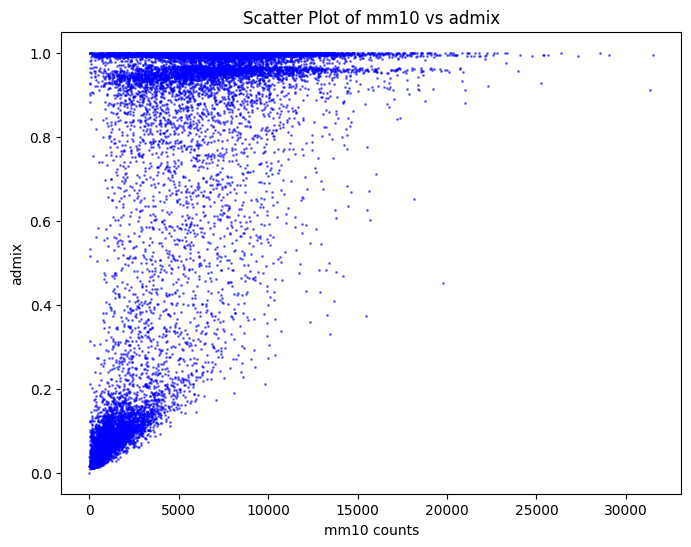

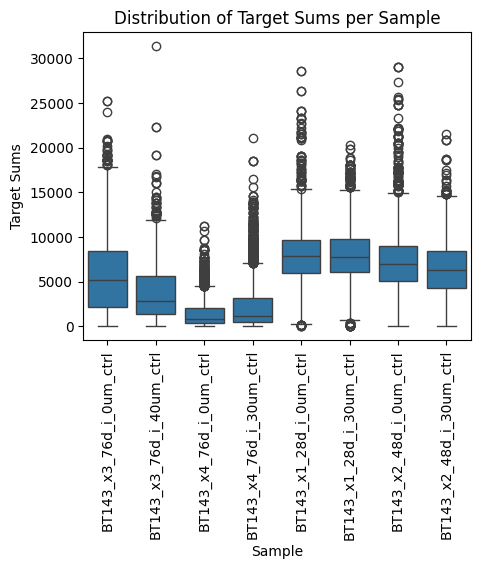

In [ ]:
import os 
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
import matplotlib.pyplot as plt
import pandas as pd
import scanpy as sc
import numpy as np
import seaborn as sns


df_admix = pd.read_csv(fr"Z:\MorrissyLab Dropbox\Visium_profiling\benchmark\simulation\stats\sample_obs.csv")



plt.figure(figsize=(8, 6))
plt.scatter(df_admix['mm10'], df_admix['admix'], c='blue', marker='o', s=1, alpha=0.5)
plt.xlabel('mm10 counts')
plt.ylabel('admix')
plt.title('Scatter Plot of mm10 vs admix')
plt.savefig(os.path.join(r"Z:\MorrissyLab Dropbox\Manuscripts_in_progress\Wassgard\Raw_Data", "XenoBenchmark", f"scatter_plot.pdf"))

plt.show()


n_samples = 3000
sample_data = []

for sample_name in df_admix["sample_id"].unique():
    sub_df = df_admix[df_admix["sample_id"] == sample_name]
    np.random.seed(42)
    # target_sums = np.random.choice(sub_df['mm10'].values, size=n_samples)
    target_sums = np.random.choice(sub_df['mm10'].values, size=n_samples)

    # Store data for plotting
    sample_data.extend([(sample_name, val) for val in target_sums])

# Convert to DataFrame
plot_df = pd.DataFrame(sample_data, columns=["Sample", "Target Sums"])

# Create boxplot
plt.figure(figsize=(5, 4))
sns.boxplot(x="Sample", y="Target Sums", data=plot_df)
plt.xticks(rotation=90)  # Rotate x-axis labels if there are many samples
plt.title("Distribution of Target Sums per Sample")
plt.savefig(os.path.join(r"Z:\MorrissyLab Dropbox\Manuscripts_in_progress\Wassgard\Raw_Data", "XenoBenchmark", f"counts_stats.pdf"))
plt.show()


## Gold Standard Xenograft vs Normal Stereoseq

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define paths
baseline_sample = "stereoseq_mouse_brain_li2023_sim_norm_mm"
baseline_results_dir = os.path.join(base_dir, "ismb_results_wassgard")
df_metric_baseline = pd.read_csv(os.path.join(baseline_results_dir, baseline_sample, "analysis", f"metrics_{baseline_sample}.csv"))
df_pivot_baseline = df_metric_baseline.pivot(index="celltype", columns="experiment", values="COSINE")

methods = ["ot", "stdecon", "cnmf", "nmf"]

fig, axes = plt.subplots(len(running_datasets), len(methods), figsize=(8.5, 11),  sharey=True)
axes = axes.flatten()  # Flatten for easy iteration

i = 0
for dataset in running_datasets:
    df_metrics = pd.read_csv(os.path.join(results_dir, dataset, "analysis", f"metrics_{dataset}.csv"))
    df_pivot = df_metrics.pivot(index="celltype", columns="experiment", values="COSINE")

    df_diff = df_pivot_baseline - df_pivot
    # df_diff.sort_values(by="ot", inplace=True)
    df_melted = df_diff.reset_index().melt(id_vars="celltype", var_name="method", value_name="Diff")
    df_melted = df_melted.sort_values(["method", "Diff"])
    # Plot each method separately
    for method in methods:
        ax = axes[i]
        subset = df_melted[df_melted["method"] == method]

        # Bar plot
        bars = sns.barplot(data=subset, x="celltype", y="Diff", ax=ax)

        # # Manually set colors
        # for bar, diff in zip(bars.patches, subset["Diff"]):
        #     bar.set_color("red" if diff > 0 else "blue")

        # Formatting
        ax.axhline(0, color="black", linewidth=1)
        ax.set_title(f"{method}")
        ax.set_ylabel("Diff Cosine")
        ax.set_xlabel("Cell Type")
        # ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
        ax.set_xticklabels([])

        i += 1

# Adjust layout
plt.tight_layout()
plt.show()

In [59]:
# Compute the difference

for dataset in running_datasets:
    df_metrics = pd.read_csv(os.path.join(results_dir, dataset, "analysis", f"metrics_{dataset}.csv"))
    df_pivot = df_metrics.pivot(index="celltype", columns="experiment", values="COSINE")

    df_diff = df_pivot_baseline - df_pivot
    # Reshape for seaborn
    df_melted = df_diff.reset_index().melt(id_vars="celltype", var_name="method", value_name="Diff")

    # Get unique methods
    methods = ["ot", "stdecon", "cnmf", "nmf"]

    # Create subplots
    fig, axes = plt.subplots(1, 4, figsize=(8.5, 5), sharex=True, sharey=True)
    axes = axes.flatten()  # Flatten for easy iteration

    # Plot each method separately
    for i, method in enumerate(methods):
        ax = axes[i]
        subset = df_melted[df_melted["method"] == method]
        
        # Bar plot
        bars = sns.barplot(data=subset, x="celltype", y="Diff", ax=ax)
        
        # Manually set colors
        for bar, diff in zip(bars.patches, subset["Diff"]):
            bar.set_color("red" if diff > 0 else "blue")
        
        # Formatting
        ax.axhline(0, color='black', linewidth=1)
        ax.set_title(f"Method: {method}")
        ax.set_ylabel("Diff Cosine")
        ax.set_xlabel("celltype")
        ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=6)


    # Adjust layout
    plt.suptitle(f"Diff Cosine (normal vs xenograft) {dataset}")
    plt.tight_layout()
    plt.savefig(os.path.join(r"Z:\MorrissyLab Dropbox\Manuscripts_in_progress\Wassgard\Raw_Data", "XenoBenchmark", f"barplot_normal_vs_xeno_{dataset}_scenario1.pdf"))


In [ ]:
# List to store pivoted DataFrames
pivot_dfs = []

for dataset in running_datasets:
    df_metrics = pd.read_csv(os.path.join(results_dir, dataset, "analysis", f"metrics_{dataset}.csv"))
    df_pivot = df_metrics.pivot(index="celltype", columns="experiment", values="COSINE")
    pivot_dfs.append(df_pivot)

# Compute the average across datasets
df_pivot_avg = sum(pivot_dfs) / len(pivot_dfs)



df_diff = df_pivot_baseline - df_pivot_avg
# Reshape for seaborn
df_melted = df_diff.reset_index().melt(id_vars="celltype", var_name="method", value_name="Diff")

# Get unique methods
methods = ["ot", "stdecon", "cnmf", "nmf"]

# Create subplots
fig, axes = plt.subplots(1, 4, figsize=(20, 5), sharex=True, sharey=True)
axes = axes.flatten()  # Flatten for easy iteration

# Plot each method separately
for i, method in enumerate(methods):
    ax = axes[i]
    subset = df_melted[df_melted["method"] == method]
    
    # Bar plot
    bars = sns.barplot(data=subset, x="celltype", y="Diff", ax=ax)
    
    # Manually set colors
    for bar, diff in zip(bars.patches, subset["Diff"]):
        bar.set_color("red" if diff > 0 else "blue")
    
    # Formatting
    ax.axhline(0, color='black', linewidth=1)
    ax.set_title(f"Method: {method}")
    ax.set_ylabel("Diff Cosine")
    ax.set_xlabel("celltype")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=6)



# Adjust layout
plt.suptitle(f"Diff Cosine (normal vs xenograft) Average")
plt.tight_layout()
plt.savefig(os.path.join(r"Z:\MorrissyLab Dropbox\Manuscripts_in_progress\Wassgard\Raw_Data", "XenoBenchmark", f"barplot_normal_vs_xeno_average_2_scenario1.pdf"))
plt.show()


In [ ]:
# Plotting
num_cols = len(df_pivot_baseline.columns)
x = range(len(df_pivot_baseline))  # x positions

fig, axes = plt.subplots(nrows=1, ncols=num_cols, figsize=(20, 5))

# Loop through each column and plot
for i, col in enumerate(methods):
    axes[i].bar(x, df_pivot_baseline[col], width=0.4, label='Normal', align='center', color='blue')
    axes[i].bar(x, df_pivot_avg[col], width=0.4, label='Xenograft', align='edge', color='orange')
    axes[i].set_title(col)
    axes[i].set_xticks(x)
    axes[i].set_xticklabels(df_pivot_baseline.index)
    axes[i].legend()
    axes[i].set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=6)

# Display the plot
plt.tight_layout()
plt.savefig(os.path.join(r"Z:\MorrissyLab Dropbox\Manuscripts_in_progress\Wassgard\Raw_Data", "XenoBenchmark", f"barplot_normal_vs_xeno_average_2_2_scenario1.pdf"))
plt.show()

In [ ]:
pivot_dfs = []

for dataset in running_datasets:
    df_metrics = pd.read_csv(os.path.join(results_dir, dataset, "analysis", f"metrics_{dataset}.csv"))
    df_pivot = df_metrics.pivot(index="celltype", columns="experiment", values="COSINE")
    pivot_dfs.append(df_pivot)

# Compute the average across datasets
df_pivot_all = pd.concat(pivot_dfs)

import matplotlib.pyplot as plt


fig, axes = plt.subplots(nrows=1, ncols=num_cols, figsize=(8.5, 5))
# Loop through each column and plot boxplots
for i, col in enumerate(methods):
    # Prepare data for boxplots
    normal_data = df_pivot_baseline[col].values  # Values for Normal
    xenograft_data = df_pivot_all[col].values  # Values for Xenograft
    
    # Create a boxplot for Normal and Xenograft with different colors
    box = axes[i].boxplot([normal_data, xenograft_data], positions=[1, 2], widths=0.4, patch_artist=True)
    
    # Set colors for Normal and Xenograft
    for patch, median in zip(box['boxes'], box['medians']):
        # Set color for Normal (blue)
        patch.set_facecolor('blue')
        median.set_color('white')  # Median line for Normal
        
    for patch, median in zip(box['boxes'][1:], box['medians'][1:]):
        # Set color for Xenograft (orange)
        patch.set_facecolor('orange')
        median.set_color('white')  # Median line for Xenograft
    
    # Set title and labels
    axes[i].set_title(col)
    axes[i].set_xticks([1, 2])  # x-ticks for Normal and Xenograft
    axes[i].set_xticklabels(['Normal', 'Xenograft'])  # Label the x-ticks
    axes[i].tick_params(axis='x', labelrotation=45, labelsize=10)  # Rotate labels for better readability

# Display the plot
plt.suptitle(f"Cosine Performance")
plt.tight_layout()
plt.savefig(os.path.join(r"Z:\MorrissyLab Dropbox\Manuscripts_in_progress\Wassgard\Raw_Data", "XenoBenchmark", f"boxplot_normal_vs_xeno_all_2_scenario1.pdf"))
plt.show()



In [ ]:
import matplotlib.pyplot as plt


fig, axes = plt.subplots(nrows=1, ncols=num_cols, figsize=(8.5, 5))
# Loop through each column and plot boxplots
for i, col in enumerate(methods):
    # Prepare data for boxplots
    normal_data = df_pivot_baseline[col].values  # Values for Normal
    xenograft_data = df_pivot_avg[col].values  # Values for Xenograft
    
    # Create a boxplot for Normal and Xenograft with different colors
    box = axes[i].boxplot([normal_data, xenograft_data], positions=[1, 2], widths=0.4, patch_artist=True)
    
    # Set colors for Normal and Xenograft
    for patch, median in zip(box['boxes'], box['medians']):
        # Set color for Normal (blue)
        patch.set_facecolor('blue')
        median.set_color('white')  # Median line for Normal
        
    for patch, median in zip(box['boxes'][1:], box['medians'][1:]):
        # Set color for Xenograft (orange)
        patch.set_facecolor('orange')
        median.set_color('white')  # Median line for Xenograft
    
    # Set title and labels
    axes[i].set_title(col)
    axes[i].set_xticks([1, 2])  # x-ticks for Normal and Xenograft
    axes[i].set_xticklabels(['Normal', 'Xenograft'])  # Label the x-ticks
    axes[i].tick_params(axis='x', labelrotation=45, labelsize=10)  # Rotate labels for better readability

# Display the plot
plt.suptitle(f"Cosine Performance Average")
plt.tight_layout()
plt.savefig(os.path.join(r"Z:\MorrissyLab Dropbox\Manuscripts_in_progress\Wassgard\Raw_Data", "XenoBenchmark", f"boxplot_normal_vs_xeno_average_2_scenario1.pdf"))
plt.show()


In [64]:
for dataset in running_datasets:
    df_metrics = pd.read_csv(os.path.join(results_dir, dataset, "analysis", f"metrics_{dataset}.csv"))
    df_pivot = df_metrics.pivot(index="celltype", columns="experiment", values="COSINE")

    df_diff = df_pivot_baseline - df_pivot
    # Reshape for seaborn
    df_melted = df_diff.reset_index().melt(id_vars="celltype", var_name="method", value_name="Diff")

    # Get unique methods
    methods = ["ot", "stdecon", "cnmf", "nmf"]

        # Create subplots
    fig, axes = plt.subplots(nrows=1, ncols=num_cols, figsize=(8.5, 5))
    # Loop through each column and plot boxplots
    for i, col in enumerate(methods):
        # Prepare data for boxplots
        normal_data = df_pivot_baseline[col].values  # Values for Normal
        xenograft_data = df_pivot[col].values  # Values for Xenograft
        
        # Create a boxplot for Normal and Xenograft with different colors
        box = axes[i].boxplot([normal_data, xenograft_data], positions=[1, 2], widths=0.4, patch_artist=True)
        
        # Set colors for Normal and Xenograft
        for patch, median in zip(box['boxes'], box['medians']):
            # Set color for Normal (blue)
            patch.set_facecolor('blue')
            median.set_color('white')  # Median line for Normal
            
        for patch, median in zip(box['boxes'][1:], box['medians'][1:]):
            # Set color for Xenograft (orange)
            patch.set_facecolor('orange')
            median.set_color('white')  # Median line for Xenograft
        
        # Set title and labels
        axes[i].set_title(col)
        axes[i].set_xticks([1, 2])  # x-ticks for Normal and Xenograft
        axes[i].set_xticklabels(['Normal', 'Xenograft'])  # Label the x-ticks
        axes[i].tick_params(axis='x', labelrotation=45, labelsize=10)  # Rotate labels for better readability


    # Adjust layout
    plt.suptitle(f"Diff Cosine (normal vs xenograft) {dataset}")
    plt.tight_layout()
    plt.savefig(os.path.join(r"Z:\MorrissyLab Dropbox\Manuscripts_in_progress\Wassgard\Raw_Data", "XenoBenchmark", f"boxplot_normal_vs_xeno_{dataset}_scenario1.pdf"))
    # plt.show()

### TME Statsitcs 

In [ ]:
import os
import pandas as pd
import sys
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
import matplotlib.pyplot as plt
import seaborn as sns
# Helper function to shorten dataset names
def shorten_name(name):
    if name == "stereoseq_mouse_brain_li2023_sim_norm_mm":
        return "stereoseq_mouse_brain"
    return "_".join(name.split("_")[:5]).replace('_i_','')  # Keep only first 3 parts




base_dir = "Z:\\MorrissyLab Dropbox\\Visium_profiling\\benchmark"
data_dir = os.path.join(base_dir, "data")
results_dir = os.path.join(base_dir, "ismb_results_wassgard_xeno_v2")
manuscript_dir = r'Z:\MorrissyLab Dropbox\Manuscripts_in_progress\Wassgard'


dataset_list = [
    "BT143_x1_28d_i_0um_ctrl_tme",
    "BT143_x2_48d_i_0um_ctrl_tme",
    "BT143_x3_76d_i_0um_ctrl_tme",
    "BT143_x4_76d_i_0um_ctrl_tme",
    "BT143_x1_28d_i_30um_ctrl_tme",
    "BT143_x2_48d_i_30um_ctrl_tme", 
    "BT143_x3_76d_i_40um_ctrl_tme",
    "BT143_x4_76d_i_30um_ctrl_tme",
]
tme_list_template = ['Astr3', 'Astr5', "OPC", "Ependymal"]

df_list = []
for dataset in dataset_list:
    file_path = os.path.join(results_dir, dataset, "analysis", f"metrics_{dataset}.csv")
    if os.path.exists(file_path):
        df_metrics = pd.read_csv(file_path)
        df_metrics["dataset"] = shorten_name(dataset)  # Add shortened name
        df_list.append(df_metrics)

dataset = "stereoseq_mouse_brain_li2023_sim_norm_mm"
file_path = os.path.join(base_dir, "ismb_results_wassgard", dataset, "analysis", f"metrics_{dataset}.csv")
if os.path.exists(file_path):
    df_metrics = pd.read_csv(file_path)
    df_metrics["dataset"] = shorten_name(dataset)  # Add shortened name
    df_list.append(df_metrics)



df_all = pd.concat(df_list, ignore_index=True)

# Filter for only relevant cell types
df_filtered = df_all[df_all["celltype"].isin(tme_list_template)]

# Sort x-axis (dataset)
df_filtered["dataset"] = pd.Categorical(df_filtered["dataset"], 
                                              categories=sorted(set(df_filtered["dataset"])), 
                                              ordered=True)

# Plotting
fig, axes = plt.subplots(2, 2, figsize=(12, 10), sharex=True, sharey=True)
axes = axes.flatten()

for i, cell_type in enumerate(tme_list_template):
    ax = axes[i]
    df_subset = df_filtered[df_filtered["celltype"] == cell_type]
    
    sns.scatterplot(data=df_subset, x="dataset", y="COSINE", hue="experiment", style="experiment", ax=ax)
    sns.lineplot(data=df_subset, x="dataset", y="COSINE", hue="experiment", ax=ax, legend=False)
    
    ax.set_title(cell_type)
    ax.tick_params(axis='x', rotation=90)

fig.suptitle("COSINE Similarity Across Simulated Datasets for TME Cell Types", fontsize=14)
plt.tight_layout()
plt.savefig(os.path.join(r"Z:\MorrissyLab Dropbox\Manuscripts_in_progress\Wassgard\Raw_Data", "XenoBenchmark", f"scatter_tme_normal_vs_xeno.pdf"))

plt.show()

In [ ]:


df_all = pd.concat(df_list, ignore_index=True)

# Filter for only relevant cell types
df_filtered = df_all

# Sort x-axis (dataset)
df_filtered["dataset"] = pd.Categorical(df_filtered["dataset"], 
                                              categories=sorted(set(df_filtered["dataset"])), 
                                              ordered=True)

# Plotting
fig, axes = plt.subplots(5, 6, figsize=(100, 50), sharex=True, sharey=True)
axes = axes.flatten()

for i, cell_type in enumerate(df_all["celltype"].unique()):
    ax = axes[i]
    df_subset = df_filtered[df_filtered["celltype"] == cell_type]
    
    sns.scatterplot(data=df_subset, x="dataset", y="COSINE", hue="experiment", style="experiment", ax=ax)
    sns.lineplot(data=df_subset, x="dataset", y="COSINE", hue="experiment", ax=ax, legend=False)
    
    ax.set_title(cell_type)
    ax.tick_params(axis='x', rotation=90)

fig.suptitle("COSINE Similarity Across Simulated Datasets for TME Cell Types", fontsize=14)
plt.tight_layout()
plt.savefig(os.path.join(r"Z:\MorrissyLab Dropbox\Manuscripts_in_progress\Wassgard\Raw_Data", "XenoBenchmark", f"scatter_all_normal_vs_xeno.pdf"))

plt.show()

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Aggregate datasets
df_list = []
for dataset in dataset_list:
    file_path = os.path.join(results_dir, dataset, "analysis", f"metrics_{dataset}.csv")
    if os.path.exists(file_path):
        df_metrics = pd.read_csv(file_path)
        df_metrics["dataset"] = shorten_name(dataset)
        df_metrics["category"] = "Xenograft" if dataset.startswith("BT143") else "Normal"
        df_list.append(df_metrics)

# Add the stereoseq dataset
dataset = "stereoseq_mouse_brain_li2023_sim_norm_mm"
file_path = os.path.join(base_dir, "ismb_results_wassgard", dataset, "analysis", f"metrics_{dataset}.csv")
if os.path.exists(file_path):
    df_metrics = pd.read_csv(file_path)
    df_metrics["dataset"] = shorten_name(dataset)
    df_metrics["category"] = "Normal"
    df_list.append(df_metrics)

# Combine all data
df_all = pd.concat(df_list, ignore_index=True)

# Filter for TME cell types
df_filtered = df_all[df_all["celltype"].isin(tme_list_template)]

# Create x-axis labels as "Category-Experiment"
df_filtered["x_label"] = df_filtered["category"] + "-" + df_filtered["experiment"]

# Sort x-axis by experiment name (to keep same experiments close)
x_order = sorted(df_filtered["x_label"].unique(), key=lambda x: x.split("-")[1])  
df_filtered["x_label"] = pd.Categorical(df_filtered["x_label"], categories=x_order, ordered=True)

# Get a unique color per experiment
experiments = df_filtered["experiment"].unique()
palette = sns.color_palette("tab10", len(experiments))  # Assign colors
experiment_colors = dict(zip(experiments, palette))

# Plotting
fig, axes = plt.subplots(2, 2, figsize=(12, 10), sharex=True, sharey=True)
axes = axes.flatten()

for i, cell_type in enumerate(tme_list_template):
    ax = axes[i]
    df_subset = df_filtered[df_filtered["celltype"] == cell_type]

    # Boxplot with one color per experiment
    sns.stripplot(data=df_subset, x="x_label", y="COSINE", hue="experiment", ax=ax, palette=experiment_colors)
    # Box plot
    sns.boxplot(data=df_subset, x="x_label", y="COSINE", hue="experiment", 
                ax=ax, palette=experiment_colors, legend=False,
                boxprops={'facecolor': 'none'}, whiskerprops={'linewidth': 0})


    ax.set_title(cell_type)
    ax.set_xlabel("Category-Experiment")
    ax.set_ylabel("COSINE Similarity")
    ax.tick_params(axis='x', rotation=90)

fig.suptitle("COSINE Similarity Boxplots for TME Cell Types", fontsize=14)
plt.tight_layout()
plt.savefig(os.path.join(r"Z:\MorrissyLab Dropbox\Manuscripts_in_progress\Wassgard\Raw_Data", "XenoBenchmark", f"boxplot_tme_normal_vs_xeno.pdf"))
plt.show()


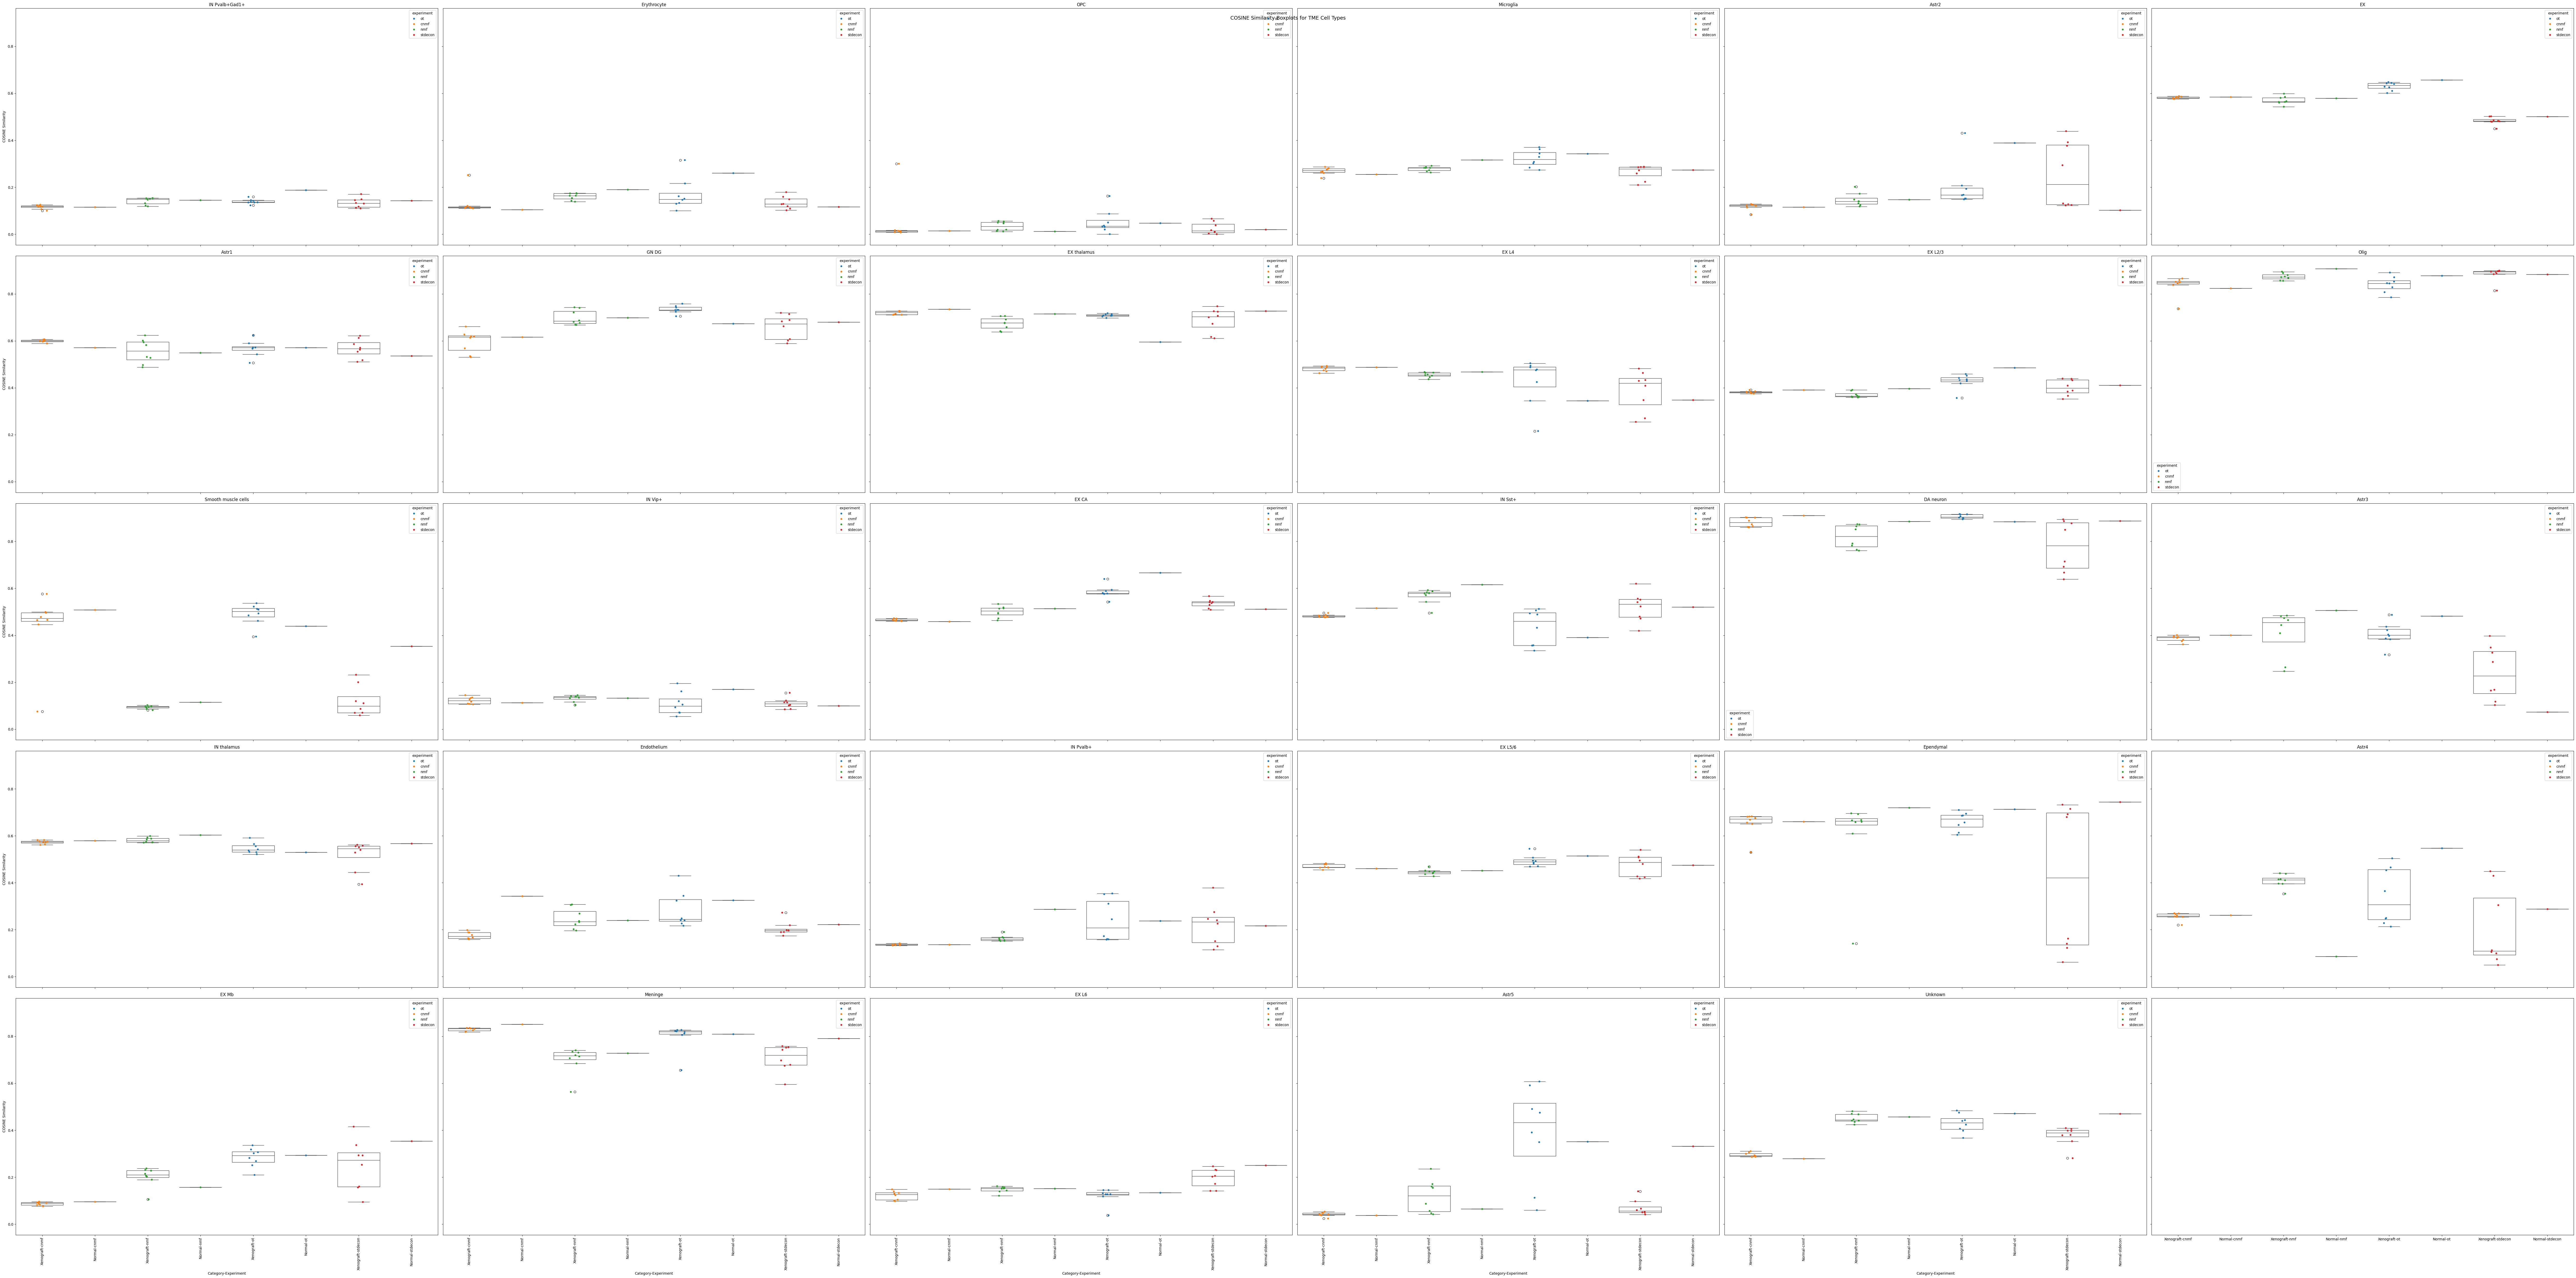

In [50]:

# Combine all data
df_all = pd.concat(df_list, ignore_index=True)

# Filter for TME cell types
df_filtered =df_all

# Create x-axis labels as "Category-Experiment"
df_filtered["x_label"] = df_filtered["category"] + "-" + df_filtered["experiment"]

# Sort x-axis by experiment name (to keep same experiments close)
x_order = sorted(df_filtered["x_label"].unique(), key=lambda x: x.split("-")[1])  
df_filtered["x_label"] = pd.Categorical(df_filtered["x_label"], categories=x_order, ordered=True)

# Get a unique color per experiment
experiments = df_filtered["experiment"].unique()
palette = sns.color_palette("tab10", len(experiments))  # Assign colors
experiment_colors = dict(zip(experiments, palette))

# Plotting
fig, axes = plt.subplots(5, 6, figsize=(100, 50), sharex=True, sharey=True)
axes = axes.flatten()

for i, cell_type in enumerate(df_all["celltype"].unique()):
    ax = axes[i]
    df_subset = df_filtered[df_filtered["celltype"] == cell_type]

    # Boxplot with one color per experiment
    sns.stripplot(data=df_subset, x="x_label", y="COSINE", hue="experiment", ax=ax, palette=experiment_colors)
    # Box plot
    sns.boxplot(data=df_subset, x="x_label", y="COSINE", hue="experiment", 
                ax=ax, palette=experiment_colors, legend=False,
                boxprops={'facecolor': 'none'}, whiskerprops={'linewidth': 0})


    ax.set_title(cell_type)
    ax.set_xlabel("Category-Experiment")
    ax.set_ylabel("COSINE Similarity")
    ax.tick_params(axis='x', rotation=90)

fig.suptitle("COSINE Similarity Boxplots for TME Cell Types", fontsize=14)
plt.tight_layout()
plt.savefig(os.path.join(r"Z:\MorrissyLab Dropbox\Manuscripts_in_progress\Wassgard\Raw_Data", "XenoBenchmark", f"boxplot_all_normal_vs_xeno.pdf"))
plt.show()

## TME Stats

In [37]:
##### moved to OTMF GOldStandard Xenograft Fig 6 

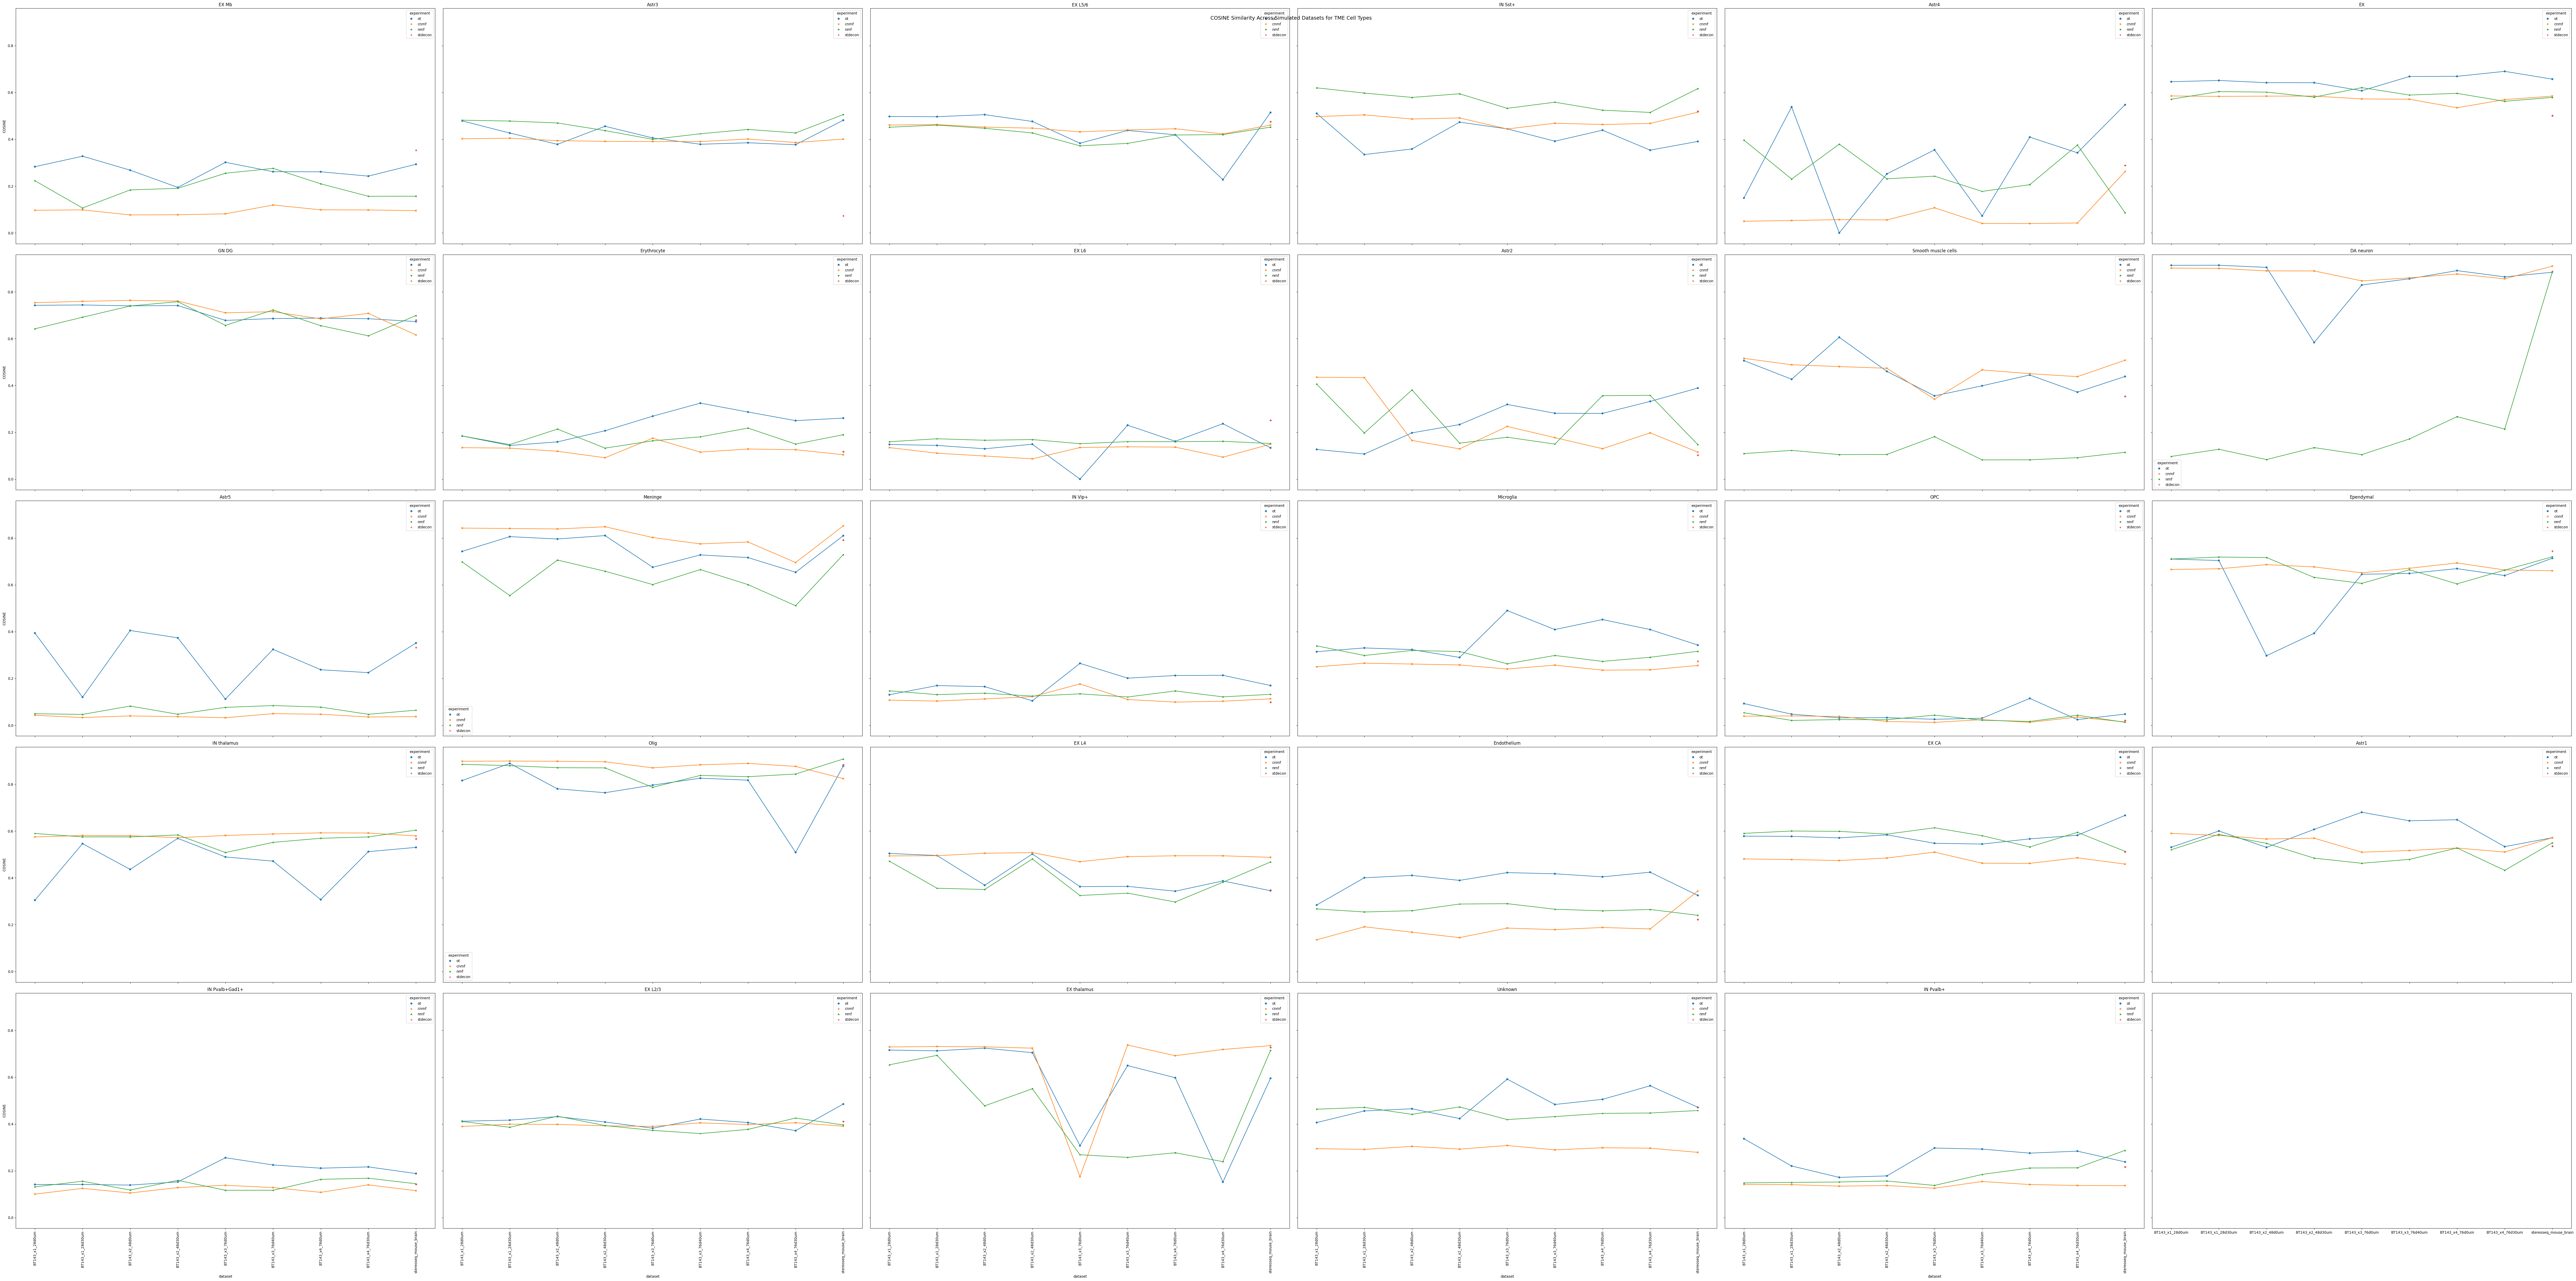

In [ ]:

# Sort x-axis (dataset)
df_filtered["dataset"] = pd.Categorical(df_filtered["dataset"], 
                                              categories=sorted(set(df_filtered["dataset"])), 
                                              ordered=True)

# Plotting
fig, axes = plt.subplots(5, 6, figsize=(100, 50), sharex=True, sharey=True)
axes = axes.flatten()

for i, cell_type in enumerate(df_all["celltype"].unique()):
    ax = axes[i]
    df_subset = df_filtered[df_filtered["celltype"] == cell_type]
    
    sns.scatterplot(data=df_subset, x="dataset", y="COSINE", hue="experiment", style="experiment", ax=ax)
    sns.lineplot(data=df_subset, x="dataset", y="COSINE", hue="experiment", ax=ax, legend=False)
    
    ax.set_title(cell_type)
    ax.tick_params(axis='x', rotation=90)

fig.suptitle("COSINE Similarity Across Simulated Datasets for TME Cell Types", fontsize=14)
plt.tight_layout()
plt.savefig(os.path.join(r"Z:\MorrissyLab Dropbox\Manuscripts_in_progress\Wassgard\Raw_Data", "XenoBenchmark2", f"scatter_all_normal_vs_xeno.pdf"))

plt.show()

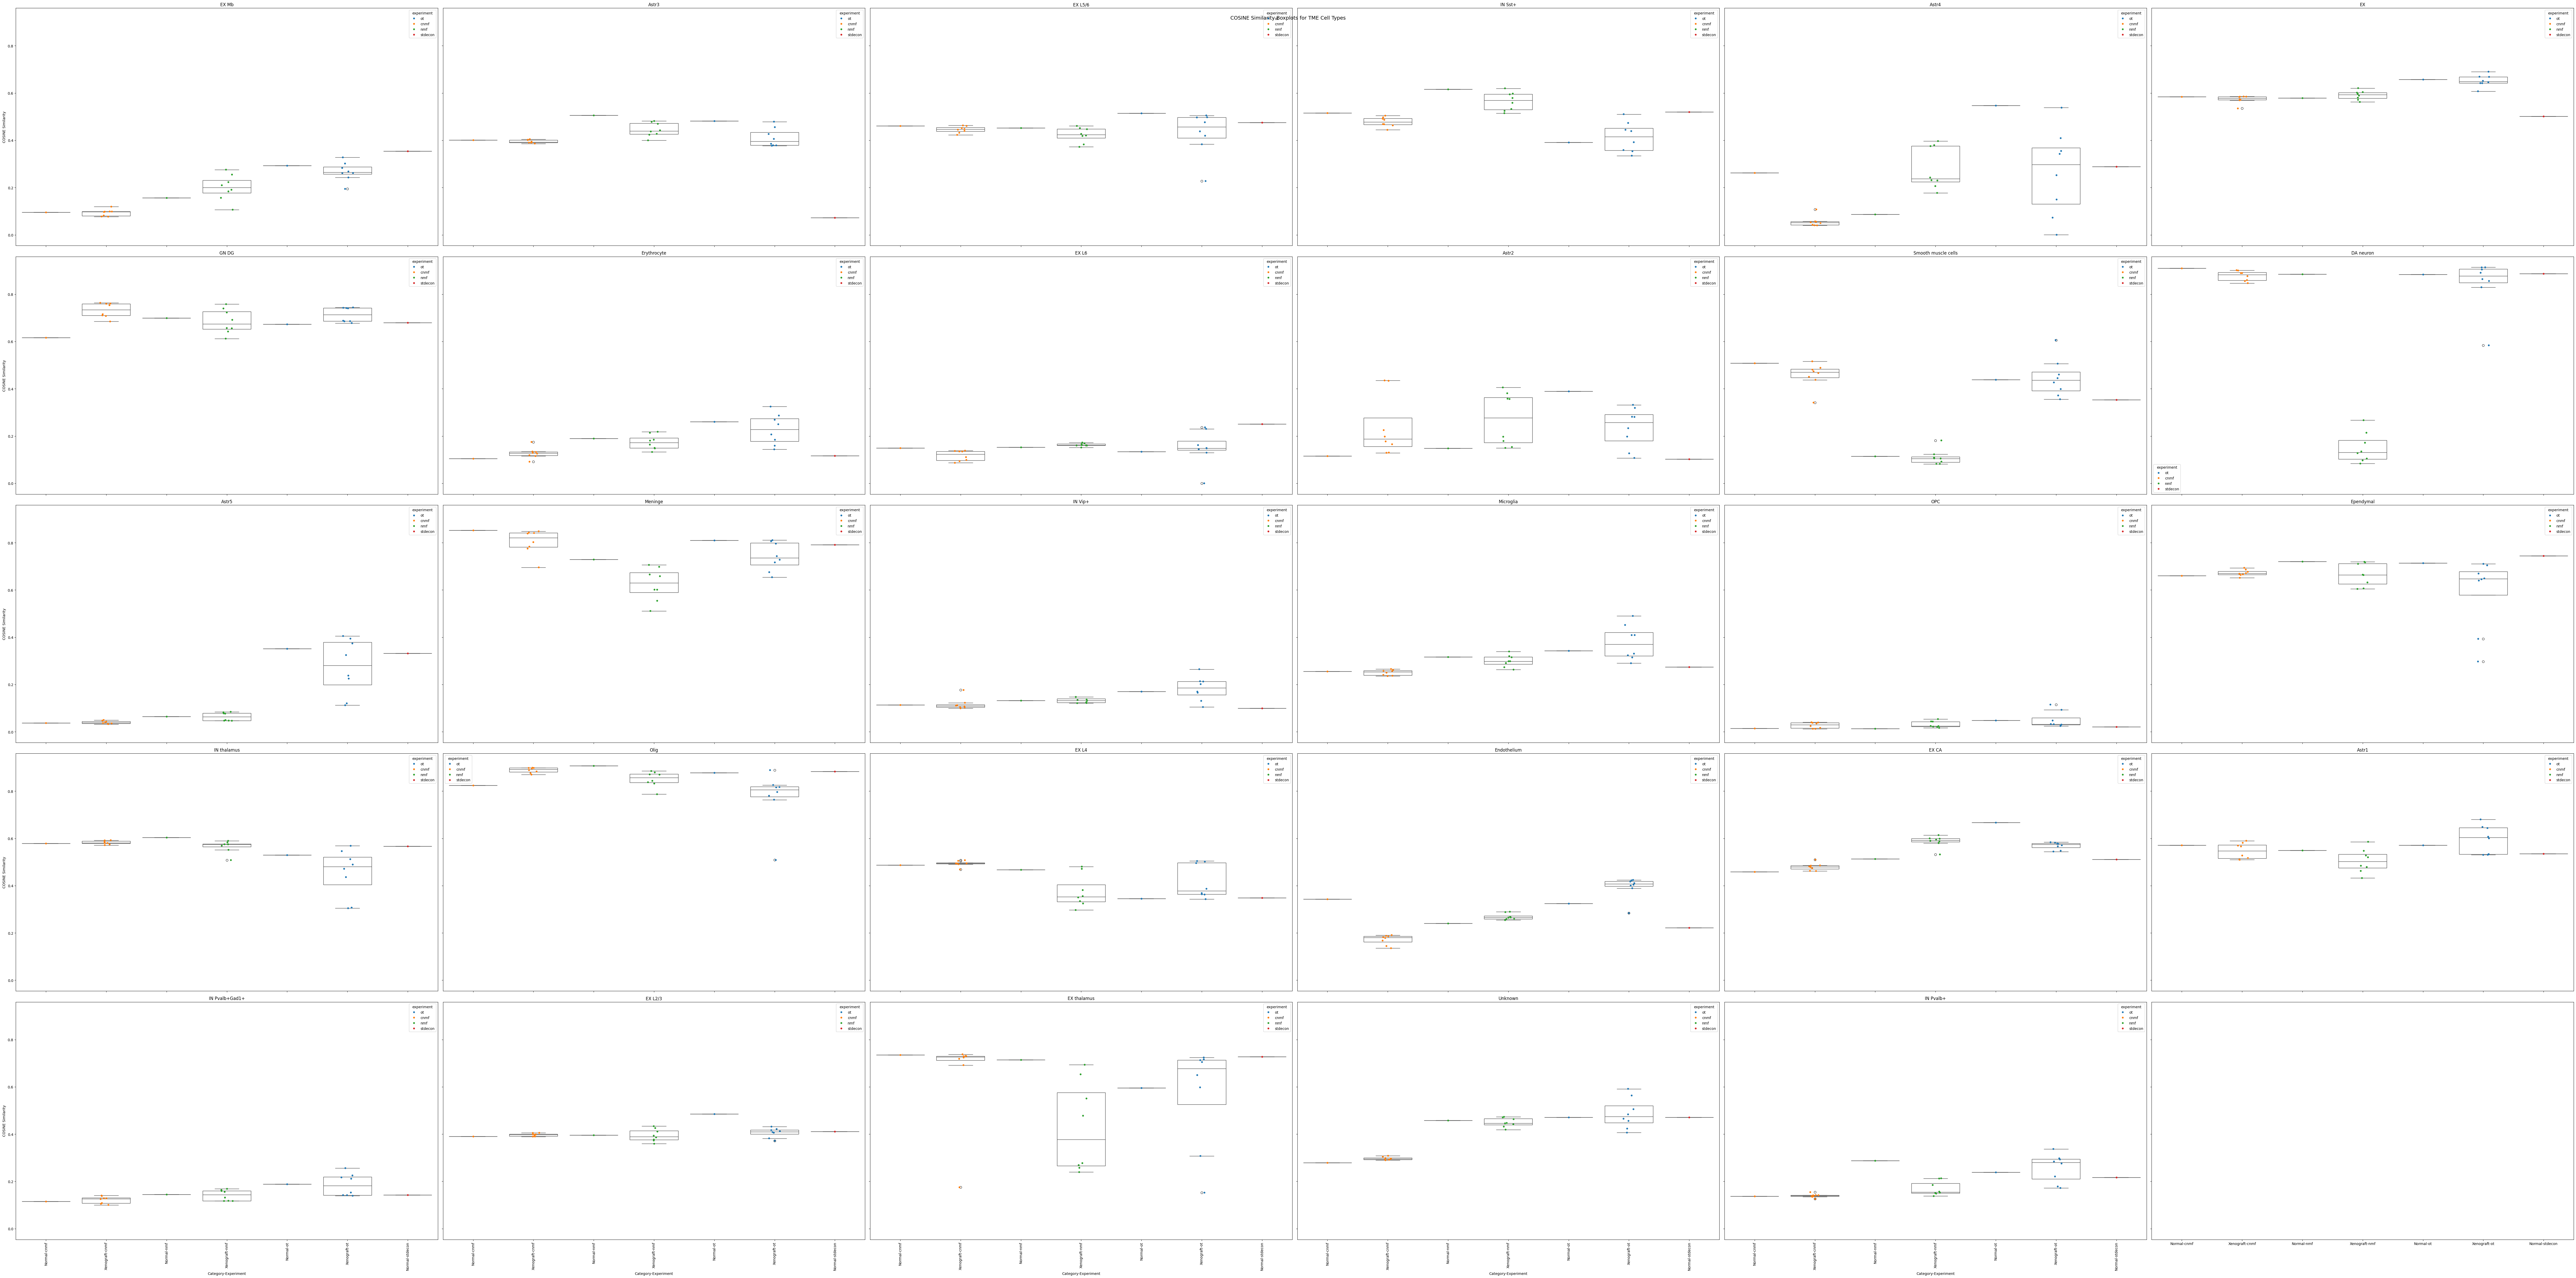

In [22]:
# Filter for TME cell types
df_filtered =df_all

# Create x-axis labels as "Category-Experiment"
df_filtered["x_label"] = df_filtered["category"] + "-" + df_filtered["experiment"]

# Sort x-axis by experiment name (to keep same experiments close)
x_order = sorted(df_filtered["x_label"].unique(), key=lambda x: x.split("-")[1])  
df_filtered["x_label"] = pd.Categorical(df_filtered["x_label"], categories=x_order, ordered=True)

# Get a unique color per experiment
experiments = df_filtered["experiment"].unique()
palette = sns.color_palette("tab10", len(experiments))  # Assign colors
experiment_colors = dict(zip(experiments, palette))

# Plotting
fig, axes = plt.subplots(5, 6, figsize=(100, 50), sharex=True, sharey=True)
axes = axes.flatten()

for i, cell_type in enumerate(df_all["celltype"].unique()):
    ax = axes[i]
    df_subset = df_filtered[df_filtered["celltype"] == cell_type]

    # Boxplot with one color per experiment
    sns.stripplot(data=df_subset, x="x_label", y="COSINE", hue="experiment", ax=ax, palette=experiment_colors)
    # Box plot
    sns.boxplot(data=df_subset, x="x_label", y="COSINE", hue="experiment", 
                ax=ax, palette=experiment_colors, legend=False,
                boxprops={'facecolor': 'none'}, whiskerprops={'linewidth': 0})


    ax.set_title(cell_type)
    ax.set_xlabel("Category-Experiment")
    ax.set_ylabel("COSINE Similarity")
    ax.tick_params(axis='x', rotation=90)

fig.suptitle("COSINE Similarity Boxplots for TME Cell Types", fontsize=14)
plt.tight_layout()
plt.savefig(os.path.join(r"Z:\MorrissyLab Dropbox\Manuscripts_in_progress\Wassgard\Raw_Data", "XenoBenchmark2", f"boxplot_all_normal_vs_xeno.pdf"))
plt.show()

### Normal 

In [12]:

df_list = []
dataset = "stereoseq_mouse_brain_li2023_sim_norm_mm"
file_path = os.path.join(base_dir, "ismb_results_wassgard", dataset, "analysis", f"metrics_{dataset}.csv")
if os.path.exists(file_path):
    df_metrics = pd.read_csv(file_path)
    df_metrics["dataset"] = shorten_name(dataset)  # Add shortened name
    df_metrics["category"] = "Normal"
    df_list.append(df_metrics)


for base_dataset in dataset_list:
    for cell_type in cell_types:
        str_cell_type = cell_type.replace(' ','_').replace('/','_')
        dataset = f"{base_dataset}_{str_cell_type}"
        file_path = os.path.join(results_dir, dataset, "analysis", f"metrics_{dataset}.csv")
        if os.path.exists(file_path):
            df_metrics = pd.read_csv(file_path)
            df_metrics = df_metrics[df_metrics["celltype"]!=cell_type]
            df_metrics["dataset"] = shorten_name(dataset)  # Add shortened name
            df_metrics["category"] = "Xenograft" if dataset.startswith("BT143") else "Normal"
            df_list.append(df_metrics)


df_all = pd.concat(df_list, ignore_index=True)

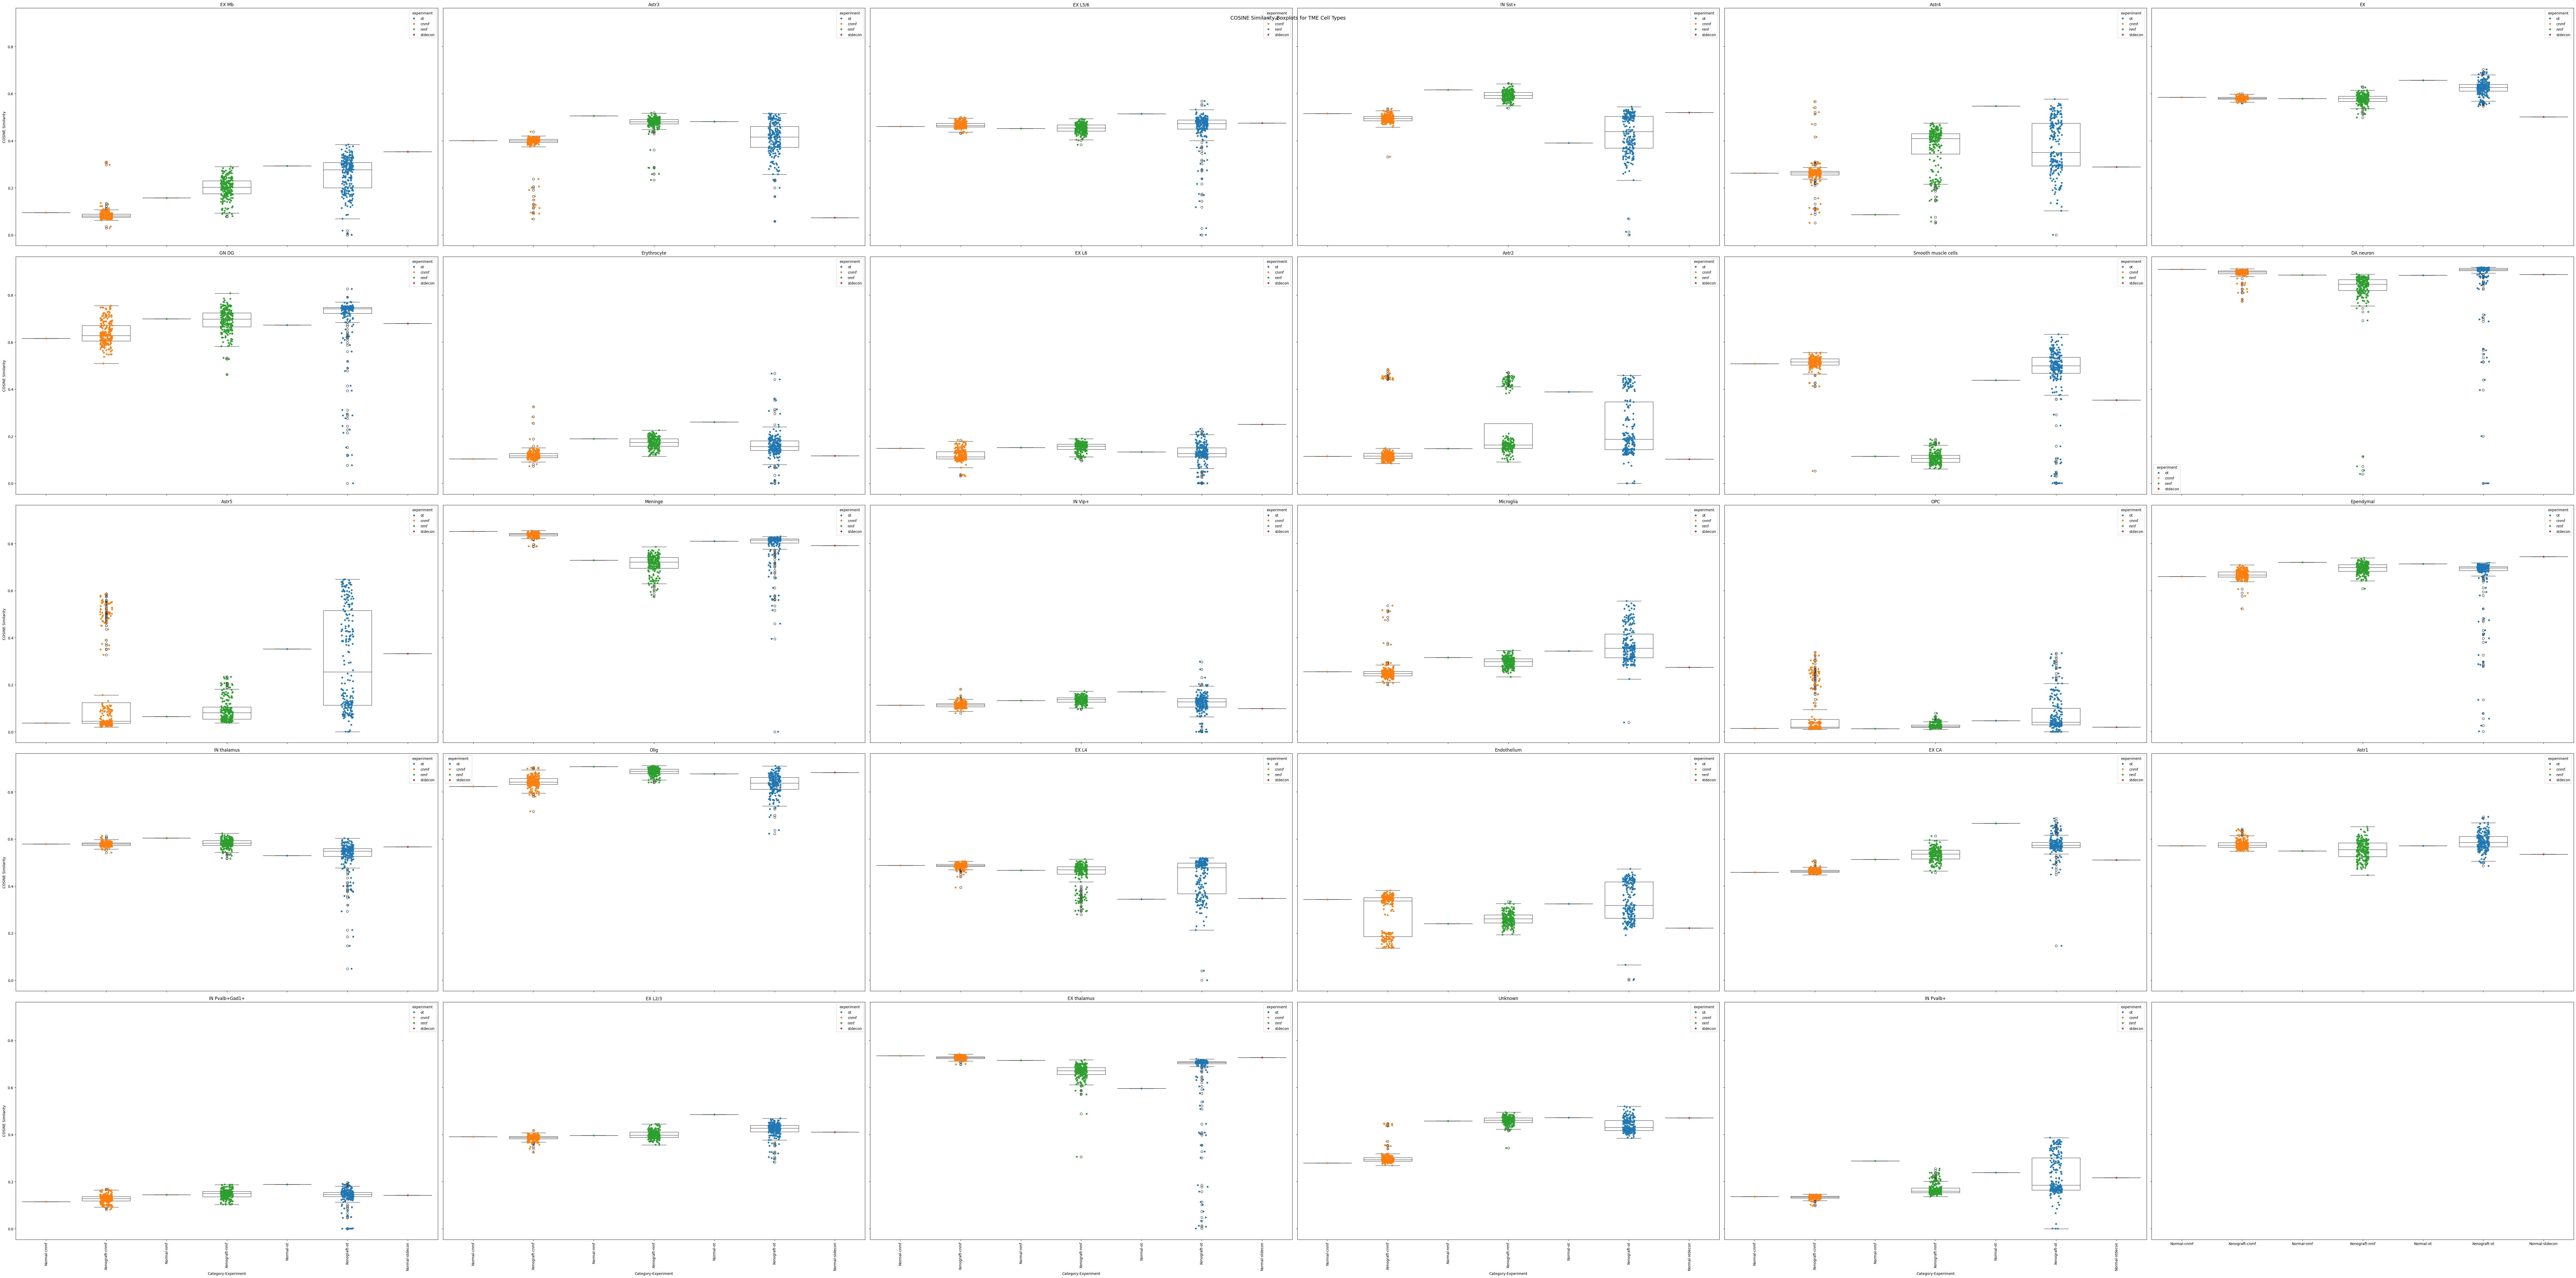

In [14]:
# Filter for TME cell types
df_filtered =df_all

# Create x-axis labels as "Category-Experiment"
df_filtered["x_label"] = df_filtered["category"] + "-" + df_filtered["experiment"]

# Sort x-axis by experiment name (to keep same experiments close)
x_order = sorted(df_filtered["x_label"].unique(), key=lambda x: x.split("-")[1])  
df_filtered["x_label"] = pd.Categorical(df_filtered["x_label"], categories=x_order, ordered=True)

# Get a unique color per experiment
experiments = df_filtered["experiment"].unique()
palette = sns.color_palette("tab10", len(experiments))  # Assign colors
experiment_colors = dict(zip(experiments, palette))

# Plotting
fig, axes = plt.subplots(5, 6, figsize=(100, 50), sharex=True, sharey=True)
axes = axes.flatten()

for i, cell_type in enumerate(df_all["celltype"].unique()):
    ax = axes[i]
    df_subset = df_filtered[df_filtered["celltype"] == cell_type]

    # Boxplot with one color per experiment
    sns.stripplot(data=df_subset, x="x_label", y="COSINE", hue="experiment", ax=ax, palette=experiment_colors)
    # Box plot
    sns.boxplot(data=df_subset, x="x_label", y="COSINE", hue="experiment", 
                ax=ax, palette=experiment_colors, legend=False,
                boxprops={'facecolor': 'none'}, whiskerprops={'linewidth': 0})


    ax.set_title(cell_type)
    ax.set_xlabel("Category-Experiment")
    ax.set_ylabel("COSINE Similarity")
    ax.tick_params(axis='x', rotation=90)

fig.suptitle("COSINE Similarity Boxplots for TME Cell Types", fontsize=14)
plt.tight_layout()
plt.savefig(os.path.join(r"Z:\MorrissyLab Dropbox\Manuscripts_in_progress\Wassgard\Raw_Data", "XenoBenchmark2", f"boxplot_all_normal_only.pdf"))
plt.show()

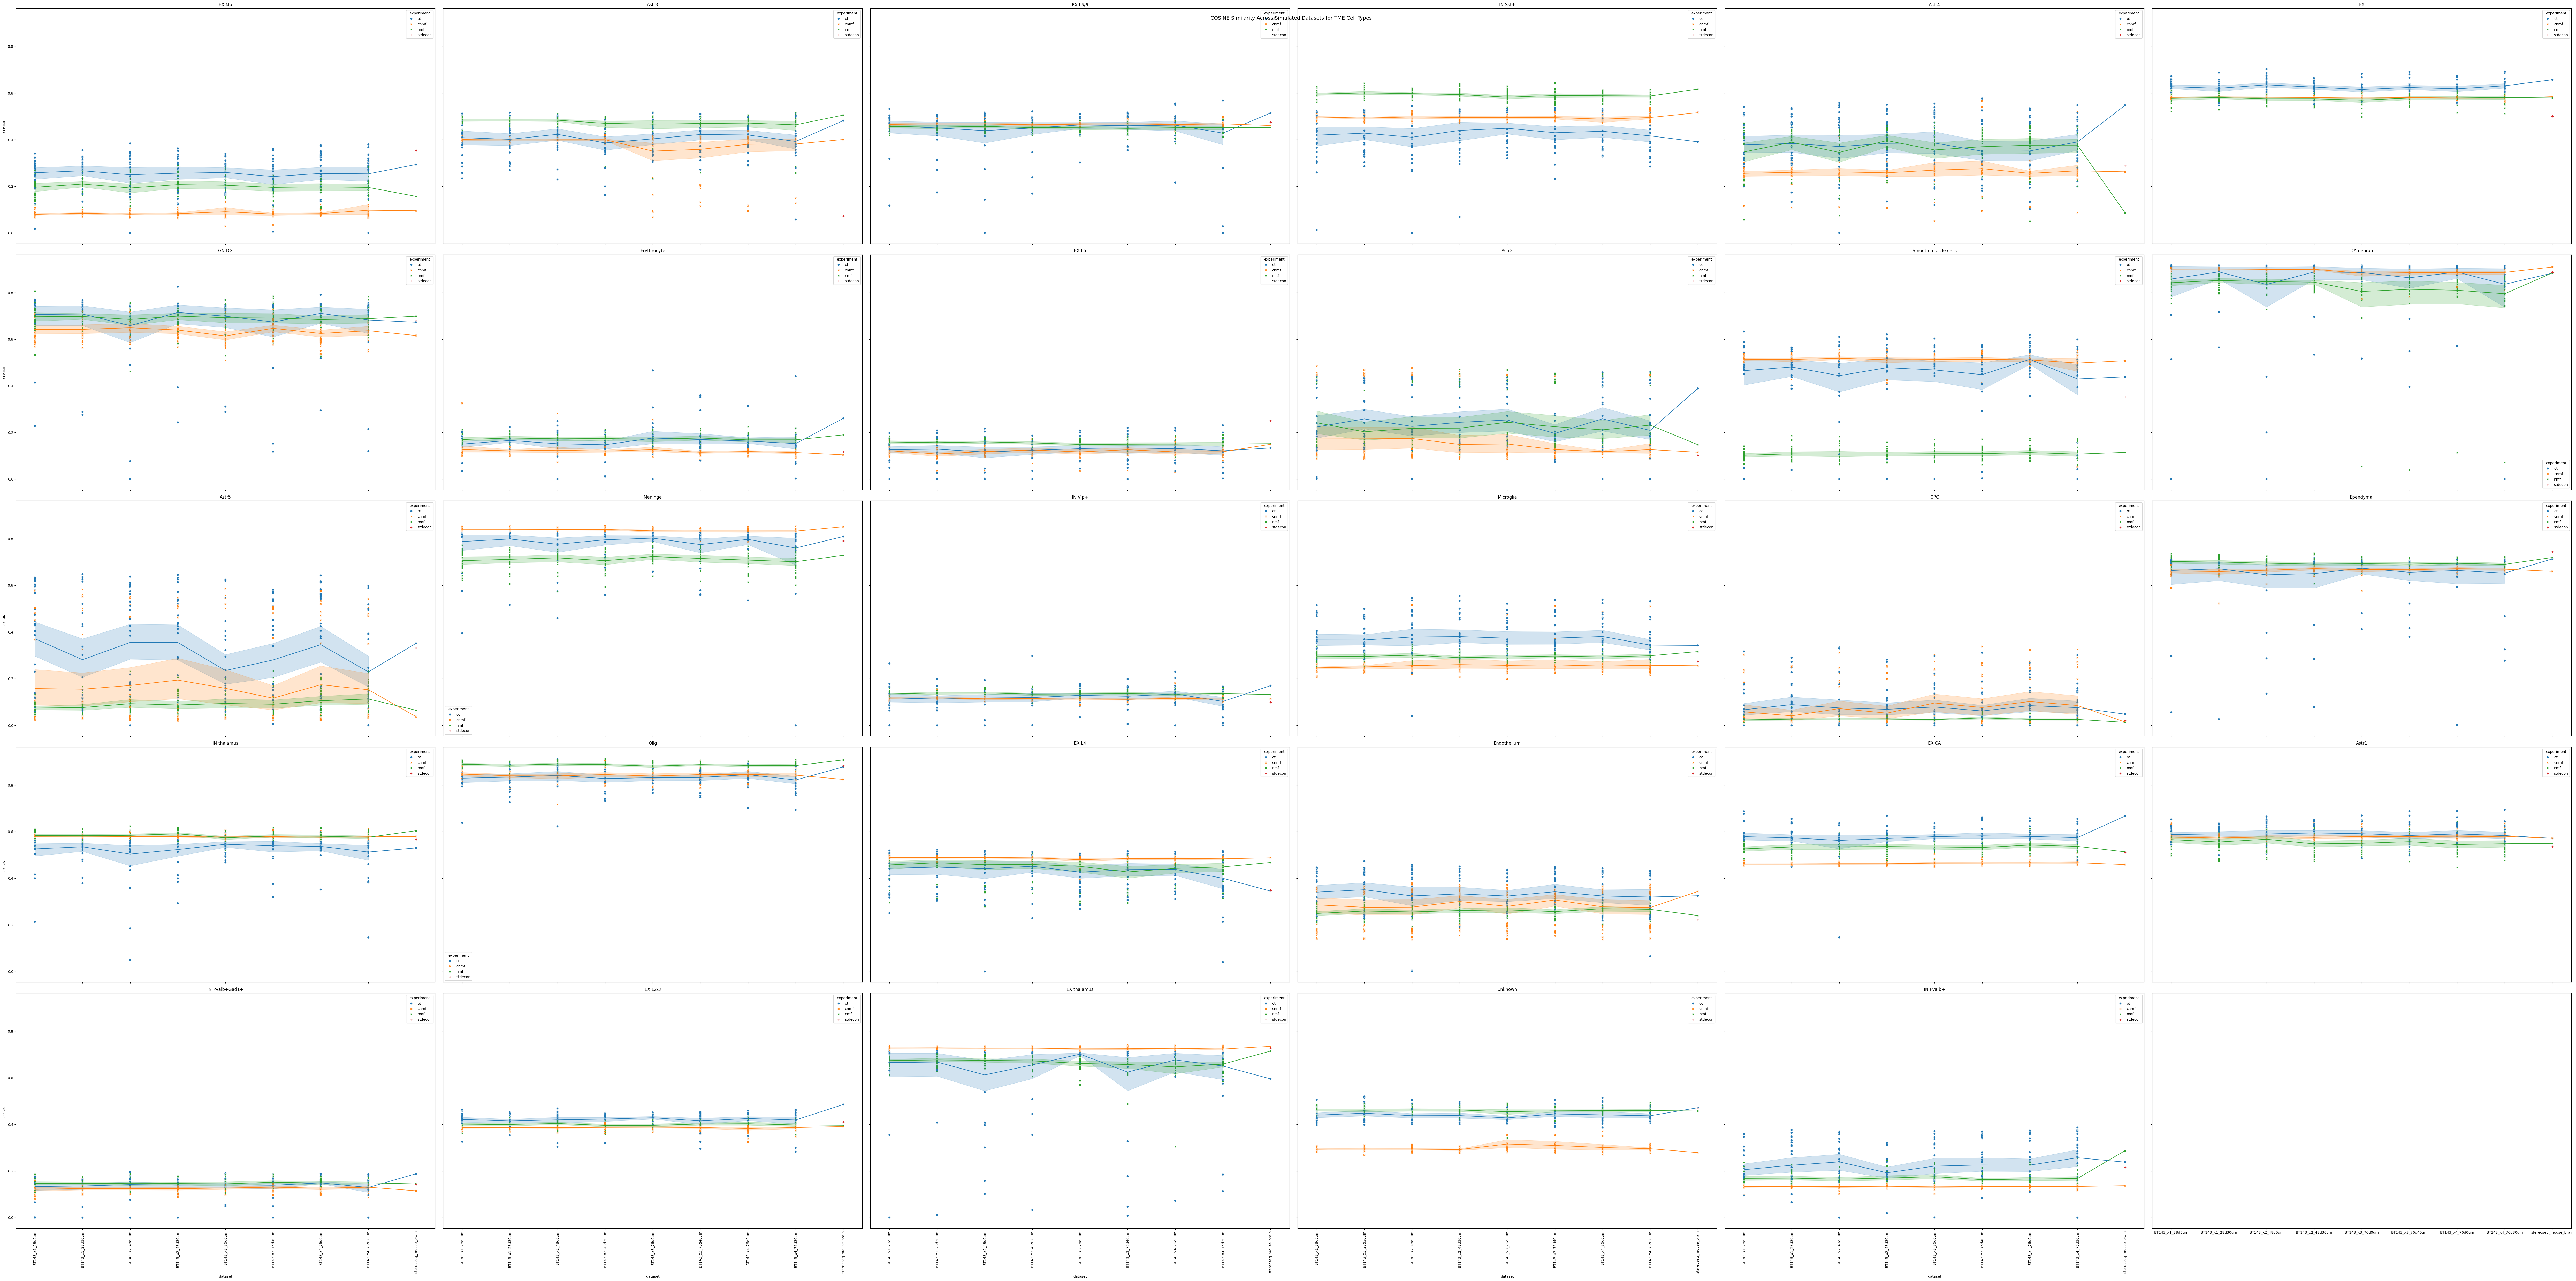

In [15]:

# Sort x-axis (dataset)
df_filtered["dataset"] = pd.Categorical(df_filtered["dataset"], 
                                              categories=sorted(set(df_filtered["dataset"])), 
                                              ordered=True)

# Plotting
fig, axes = plt.subplots(5, 6, figsize=(100, 50), sharex=True, sharey=True)
axes = axes.flatten()

for i, cell_type in enumerate(df_all["celltype"].unique()):
    ax = axes[i]
    df_subset = df_filtered[df_filtered["celltype"] == cell_type]
    
    sns.scatterplot(data=df_subset, x="dataset", y="COSINE", hue="experiment", style="experiment", ax=ax)
    sns.lineplot(data=df_subset, x="dataset", y="COSINE", hue="experiment", ax=ax, legend=False)
    
    ax.set_title(cell_type)
    ax.tick_params(axis='x', rotation=90)

fig.suptitle("COSINE Similarity Across Simulated Datasets for TME Cell Types", fontsize=14)
plt.tight_layout()
plt.savefig(os.path.join(r"Z:\MorrissyLab Dropbox\Manuscripts_in_progress\Wassgard\Raw_Data", "XenoBenchmark2", f"scatter_all_normal_only.pdf"))

plt.show()

### Variance Correlation

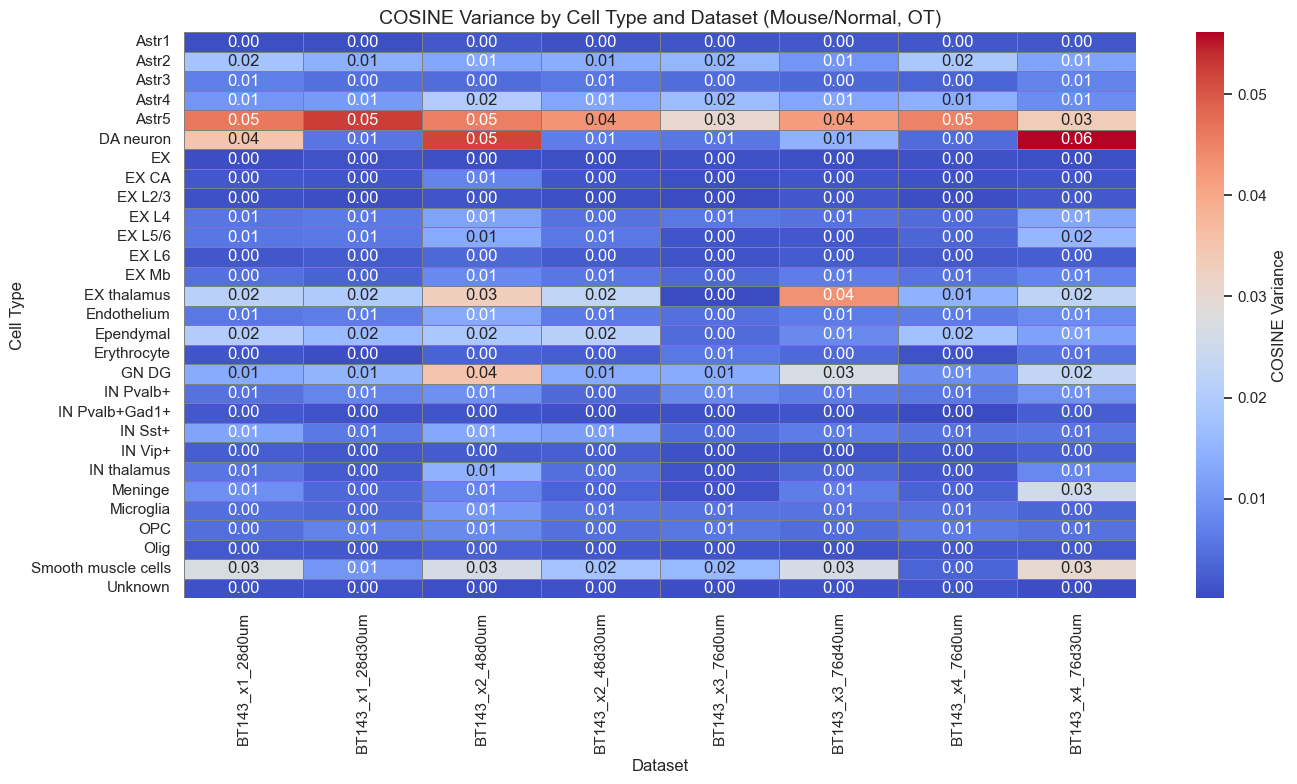

In [124]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Filter and standardize as before
df_all['cell_type_category'] = df_all['cell_type_category'].str.strip()
df_all['experiment'] = df_all['experiment'].str.strip().str.lower()

df_filtered = df_all[
    ((df_all['cell_type_category'] == 'Mouse')) &
    (df_all['experiment'] == 'ot')
]

# Compute variance of COSINE per (cell_type, dataset)
variance_df = (
    df_filtered.groupby(['celltype', 'dataset'])['COSINE']
    .var()
    .reset_index()
    .rename(columns={'COSINE': 'COSINE_variance'})
)

# Pivot for heatmap
heatmap_data = variance_df.pivot(index='celltype', columns='dataset', values='COSINE_variance')

# Plot heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(
    heatmap_data,
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    linewidths=0.5,
    linecolor='gray',
    cbar_kws={'label': 'COSINE Variance'}
)
plt.title('COSINE Variance by Cell Type and Dataset (Mouse/Normal, OT)', fontsize=14)
plt.ylabel('Cell Type')
plt.xlabel('Dataset')
plt.tight_layout()
plt.show()


In [39]:

df_all['x_group'] = df_all['experiment'] + '_' + df_all['cell_type_category']
category_order = ['Mouse', 'Normal', 'TME']
df_all['cell_type_category'] = pd.Categorical(df_all['cell_type_category'], categories=category_order, ordered=True)

x_group_order = df_all.drop_duplicates('x_group').sort_values('cell_type_category')['x_group'].tolist()

# Get list of unique celltypes
celltypes = sorted(df_all['celltype'].unique())

# Set up subplots
n = len(celltypes)
fig, axes = plt.subplots(n, 1, figsize=(5, 4 * n), sharex=True)

# Make sure axes is iterable
if n == 1:
    axes = [axes]

# Plot per celltype
for ax, celltype in zip(axes, celltypes):
    data = df_all[df_all['celltype'] == celltype]
    sns.stripplot(data=data, x='x_group', y='COSINE', hue='experiment',
                  dodge=True, jitter=True, alpha=0.7, ax=ax)
    sns.boxplot(data=data, x='x_group', y='COSINE', hue='experiment', showfliers=False,
                showcaps=True, boxprops={'facecolor': 'none', "zorder": 10}, ax=ax)

    ax.set_title(f'Celltype: {celltype}', fontsize=14)
    ax.legend_.remove()

# Add single legend
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, title="Experiment", bbox_to_anchor=(1.01, 0.5), loc='center left')
plt.xticks(rotation=45)

plt.tight_layout()
# plt.savefig(os.path.join(r"Z:\MorrissyLab Dropbox\Manuscripts_in_progress\Wassgard\Raw_Data", "XenoBenchmark2", f"boxplot_cell_type_all_data.pdf"))

plt.show()

NameError: name 'df_all' is not defined

In [ ]:
# import pandas as pd
# import seaborn as sns
# import matplotlib.pyplot as plt

# for metric in metrics:
#     # Set style
#     sns.set(style="whitegrid")

#     # Create the plot
#     plt.figure(figsize=(8, 6))
#     sns.boxplot(data=df_tme, x='experiment', y=metric, showfliers=False, palette='Set2')
#     sns.stripplot(data=df_tme, x='experiment', y=metric, jitter=True, color='black', alpha=0.5)

#     plt.title(f'{metric} values by experiment')
#     plt.ylabel(f'{metric}')
#     plt.xlabel('Experiment')
#     plt.tight_layout()
#     plt.savefig(os.path.join(r"Z:\MorrissyLab Dropbox\Manuscripts_in_progress\Wassgard\Raw_Data", "XenoBenchmark2", f"boxplot_overall_experiments_{metric}_alldatasets.pdf"))
#     plt.show()


## PDX Paramters

## Loss

In [ ]:
import os
import glob

# Directory containing your files
directory = r'Z:\MorrissyLab Dropbox\Visium_profiling\benchmark\results_loss'

# Data structure to hold parsed data
data = {'GRCh38': [], 'mm10': []}

# Iterate over each file in the directory matching the pattern
for filepath in glob.glob(os.path.join(directory, '*.txt')):
    filename = os.path.basename(filepath)

    # Extract category (GRCh38 or mm10)
    category = 'GRCh38' if 'GRCh38' in filename else 'mm10' if 'mm10' in filename else None
    if not category:
        continue

    # Extract parameters (lr, eps, h, w)
    params = filename.replace("time_pdx_all_","").replace("GRCh38_15","").replace("mm10_90","")

    # Read second number from file
    try:
        with open(filepath, 'r') as file:
            line = file.readline()
            numbers = line.strip().split('\t')
            if len(numbers) >= 2:
                value = float(numbers[1])
                data[category].append((params, value))
    except Exception as e:
        print(f"Error reading {filename}: {e}")

# Print top 10 sorted by second number (ascending)
for category in data:
    print(f"\nTop 10 results for category: {category}")
    sorted_data = sorted(data[category], key=lambda x: abs(x[1]))
    for params, value in sorted_data[:10]:
        print(f"{params}: {value}")






Top 10 results for category: GRCh38
_lr0.1eps0.05h0.005w0.05_.txt: -0.0004815494384437097
_lr0.1eps0.05h0.001w0.01_.txt: -0.010021858654892763
_lr0.1eps0.05h0.01w0.001_.txt: -0.029775937370739573
_lr0.1eps0.05h0.005w0.001_.txt: 0.044621603730995545
_lr0.1eps0.05h0.01w0.005_.txt: 0.050678793883581784
_lr0.1eps0.05h0.005w0.005_.txt: -0.061778851994717596
_lr0.1eps0.05h0.001w0.001_.txt: -0.08627353048110856
_lr0.1eps0.05h0.001w0.05_.txt: -0.08704239182651055
_lr0.1eps0.05h0.001w0.005_.txt: -0.09757923306132736
_lr0.05eps0.05h0.001w0.1_.txt: 0.09846379032066335

Top 10 results for category: mm10
_lr0.05eps0.1h0.005w0.001_.txt: -0.0076870854857955554
_lr0.1eps0.1h0.1w0.001_.txt: -0.010475362951657049
_lr0.1eps0.1h0.05w0.05_.txt: -0.010576134550295137
_lr0.01eps0.1h0.05w0.05_.txt: -0.010576136940303411
_lr0.05eps0.1h0.05w0.05_.txt: -0.010576137257226566
_lr0.001eps0.1h0.05w0.05_.txt: -0.010617180450621204
_lr0.005eps0.1h0.05w0.05_.txt: -0.010620718685645937
_lr0.1eps0.1h0.1w0.005_.txt: -0.0

## Best Annotations

In [1]:

from sklearn.metrics.pairwise import cosine_similarity
import sys
from tqdm import tqdm
sys.path.append('..')
from Wassgard.wassgard import io,annotate
import os 
import pandas as pd

def load_pdx_results(file_type):
    silver_dir = "Z:/MorrissyLab Dropbox/Visium_profiling/results/cNMF"

    silver_standard_dict = {
        "spectra_mm": 'GBM_PDX_Visium_Mm_K90/cNMF_output/Mm_all.gene_spectra_score.k_90.dt_0_10.txt',
        "spectra_hs": 'GBM_PDX_Visium_Hs_K15/cNMF_output/Hs_all.gene_spectra_score.k_15.dt_0_10.txt',
        "usage_mm": 'GBM_PDX_Visium_Mm_K90/Consensus_matrix_modified/Mm_all.usages.k_90.dt_0_10.consensus_normalized_scaledwithadmix.txt',
        "usage_hs": 'GBM_PDX_Visium_Hs_K15/Consensus_modified/Hs_all.usages.k_15.dt_0_10.consensus_normalized_scaledwithadmix.txt'
    }

    if file_type not in silver_standard_dict:
        raise ValueError(f"Invalid rank: {file_type}. Available ranks: {list(silver_standard_dict.keys())}")

    file_path = os.path.join(silver_dir, silver_standard_dict[file_type])
    
    cell2location_df = pd.read_csv(file_path, index_col=0, sep='\t')
    return cell2location_df



# results_dir_path = r"Z:\MorrissyLab Dropbox\Visium_profiling\benchmark\pdx_results_explore"

# for file in tqdm(os.listdir(os.path.join(results_dir_path,"results_pdx_explore"))):
#     pdx_df = load_pdx_results(file_type="usage_mm" if "mm10" in file else "usage_hs")

#     rf_usages= pd.read_csv(os.path.join(results_dir_path, "results_pdx_explore", file),index_col=0).fillna(0)
#     annotate.benchmark_corr_silverstandard(results_dir_path, pdx_df, rf_usages, correlation_type = "cosine", title=file.replace(".csv","").replace("topics_per_spot_pdx_all_",""))

v_odg_dir = r"Z:\MorrissyLab Dropbox\Visium_profiling\xenograft_case_study\V_ODG"

for sample_name in os.listdir(v_odg_dir):
    pdx_df = load_pdx_results(file_type="usage_mm" if "mm10" in sample_name else "usage_hs")
    results_dir_path = os.path.join(v_odg_dir, sample_name)
    rf_usages= pd.read_csv(os.path.join(results_dir_path, f"topics_per_spot_{sample_name}.csv"),index_col=0).fillna(0)
    annotate.benchmark_corr_silverstandard(results_dir_path, pdx_df, rf_usages, correlation_type = "cosine", title=sample_name)


In [ ]:
results_dict = {}
for experiment_file in tqdm(os.listdir(os.path.join(results_dir_path,"results_pdx_explore"))):
    rf_usages= pd.read_csv(os.path.join(results_dir_path, "results_pdx_explore", experiment_file),index_col=0).fillna(0)
    pdx_df = load_pdx_results(file_type="usage_mm" if "mm10" in experiment_file else "usage_hs")


    common_index = pdx_df.index.intersection(rf_usages.index)
    # Reindex both DataFrames to keep only common indices
    silver_standard_df = pdx_df.loc[common_index]
    rf_usages = rf_usages.loc[common_index]


    df_corr = pd.DataFrame(index=silver_standard_df.columns, columns=rf_usages.columns)
    for cell_type in rf_usages.columns:
        for topic in silver_standard_df.columns:
            column_value = cosine_similarity(rf_usages[cell_type].values.reshape(1, -1), silver_standard_df[topic].values.reshape(1, -1))
            df_corr.loc[topic, cell_type] = column_value[0,0]

    df_annotate = annotate.get_annotation_from_corr(df_corr)
    sorted_programs = df_annotate.sort_values(by="celltype")["program"].values
    sorted_columns = sorted(df_corr.columns)
    df_corr = df_corr[sorted_columns].reindex(sorted_programs)

    count_above_threshold = (df_corr.values.diagonal() > 0.6).sum()

    results_dict[experiment_file] = count_above_threshold

sorted_keys = sorted(results_dict, key=lambda k: results_dict[k], reverse=True)

# Printing keys with their values
for key in sorted_keys:
    print(f"{key}: {results_dict[key]}")

topics_per_spot_pdx_all_mm10_90_lr0.001eps0.1h0.01w0.01_mm10_90.csv: 35
topics_per_spot_pdx_all_mm10_90_lr0.01eps0.1h0.01w0.01_mm10_90.csv: 34
topics_per_spot_pdx_all_mm10_90_lr0.001eps0.1h0.01w0.005_mm10_90.csv: 33
topics_per_spot_pdx_all_mm10_90_lr0.005eps0.1h0.01w0.05_mm10_90.csv: 33
topics_per_spot_pdx_all_mm10_90_lr0.01eps0.1h0.005w0.01_mm10_90.csv: 33
topics_per_spot_pdx_all_mm10_90_lr0.01eps0.1h0.01w0.005_mm10_90.csv: 33
topics_per_spot_pdx_all_mm10_90_lr0.01eps0.1h0.01w0.05_mm10_90.csv: 33
topics_per_spot_pdx_all_mm10_90_lr0.001eps0.1h0.005w0.005_mm10_90.csv: 32
topics_per_spot_pdx_all_mm10_90_lr0.001eps0.1h0.005w0.05_mm10_90.csv: 32
topics_per_spot_pdx_all_mm10_90_lr0.005eps0.1h0.001w0.01_mm10_90.csv: 32
topics_per_spot_pdx_all_mm10_90_lr0.005eps0.1h0.005w0.005_mm10_90.csv: 32
topics_per_spot_pdx_all_mm10_90_lr0.01eps0.1h0.005w0.005_mm10_90.csv: 32
topics_per_spot_pdx_all_mm10_90_lr0.01eps0.1h0.01w0.001_mm10_90.csv: 32
topics_per_spot_pdx_all_mm10_90_lr0.005eps0.05h0.1w0.005_m

### Plot Admix

In [ ]:
import sys
import os
import pandas as pd
from tqdm import tqdm

sys.path.append('..')
from Wassgard.wassgard import io, annotate, pl

samples_dir = r"Z:\MorrissyLab Dropbox\Visium_profiling\morrissy-chan\aggr\pdx_merge_all"

def process_and_plot(genome, sample_name, results_dir, file_name=None, use_admix=True):
    adata = io.read_spatial_data(samples_dir, is_aggr=True, is_xenograft=True, is_spatial=True, genome=genome)
    results_dir_path = os.path.join(results_dir, sample_name)
    file_name = file_name or f"topics_per_spot_{sample_name}.csv"
    rf_usages = pd.read_csv(os.path.join(results_dir, file_name), index_col=0)

    correction = adata.obs["admix"] if use_admix else (1 - adata.obs["admix"])
    rf_usages_corrected = rf_usages.mul(correction, axis=0)

    pl.plot_spatial_all_topics_aggr(
        adata,
        rf_usages=rf_usages_corrected,
        results_dir_path=results_dir_path,
        title_name=f"{sample_name}_corrected",
        same_legend=False,
        plot_topic=True
    )

# DefaultParamters plots
process_and_plot("GRCh38", "pdx_merge_all_GRCh38_15",
    r"Z:\MorrissyLab Dropbox\Visium_profiling\xenograft_case_study\DefaultParamters\pdx_all_GRCh38_15_lr0.001eps0.05h0.05w0.01_GRCh38_15",
    use_admix=False)

process_and_plot("mm10", "pdx_merge_all_mm10_90",
    r"Z:\MorrissyLab Dropbox\Visium_profiling\xenograft_case_study\DefaultParamters\pdx_all_mm10_90_lr0.001eps0.05h0.05w0.01_mm10_90")

# BestLoss plots
process_and_plot("mm10", "pdx_merge_all_mm10_90",
    r"Z:\MorrissyLab Dropbox\Visium_profiling\xenograft_case_study\BestLoss\pdx_all_mm10_90_lr0.05eps0.1h0.005w0.001_mm10_90",
    file_name="topics_per_spot_pdx_all_mm10_90_lr0.05eps0.1h0.005w0.001_mm10_90.csv")

process_and_plot("GRCh38", "pdx_merge_all_GRCh38_15",
    r"Z:\MorrissyLab Dropbox\Visium_profiling\xenograft_case_study\BestLoss\pdx_all_GRCh38_15_lr0.1eps0.05h0.005w0.001_GRCh38_15",
    file_name="topics_per_spot_pdx_all_GRCh38_15_lr0.1eps0.05h0.005w0.001_GRCh38_15.csv",
    use_admix=False)
